# Visión por Computador - Práctica 2 - Deep Learning en Computer Vision

#### 15 puntos   |   Fecha de entrega: 7 de Diciembre, 23:59   |   Forma de entrega: a través de la tarea creada en https://pradogrado2526.ugr.es/

### Estudiante: <mark>Jose Daniel Ojeda Tro</mark>



## Normas de desarrollo y entrega de la práctica

1. Para este trabajo, al igual que para los demás, se debe presentar código, resultados, discusión de los mismos, y presentación y análisis del trabajo realizado, todo integrado en el propio Google Colab Notebook (es decir, no se entrega ninguna memoria separada en `.pdf` ni ningún código `.py`). Se recuerda que código y resultados sin informe explicativo no puntúa. Resulta también fundamental recordar que solo se acepta la entrega de ficheros `.ipynb` (no resulta válido entregar un fichero `.py`).

2. En relación con el punto anterior, se recuerda que se proporciona un Notebook, denominado `Ejemplo_Otsu.ipynb`, que muestra un ejemplo de respuesta y solución a un potencial ejercicio. El propósito de este Notebook es servir de referencia al alumnado acerca de cómo responder los ejercicios planteados. Véase que, por ejemplo, en aras de diferenciar con facilidad enunciados y respuestas, estas últimas se presentan en otro color (azul, en ese caso).

3. El diseño de celdas del documento debe ser respetado. Es decir, no se puede modificar el orden de los ejercicios o alterar la estructura del Notebook, de forma que dificulte localizar los contenidos. Aunque sí se puede, por ejemplo, crear nuevas subsecciones dentro de las secciones ya existentes para estructurar y organizar con más claridad las respuestas, así como para incluir los experimentos extra que se deseen.

4. Tal y como se muestra en `Ejemplo_Otsu.ipynb`, no hay ningún problema en emplear técnicas de IA generativa (como ChatGPT o Gemini) para crear el código de los distintos ejercicios o para enriquecer el análisis y descripción del trabajo realizado (aunque, obvia decirlo, su uso no es obligatorio). Pero, en caso de usarse, sí se debe aclarar de qué modo se ha usado la IA, con qué objetivo, y se debe demostrar que se entiende perfectamente lo que se ha hecho.

5. Solo se entregará el fichero `.ipynb` (incorporando código, resultados, y explicación del trabajo realizado y los resultados obtenidos) y no se enviarán las imágenes empleadas. El path para la lectura de imágenes, o cualquier otro fichero de entrada, debe ser siempre “/content/drive/My Drive/images/nombre_fichero”.

6. El código deberá  presentarse adecuadamente comentado y con los resultados obtenidos en cada apartado, junto con la presentación del trabajo realizado y la discusión y análisis de los resultados obtenidos. Es importante reiterar que la entrega de código sin informe explicativo o valoraciones no puntúa. Por otro lado, el código debe ir comentado en comentarios en celdas de código, mientras que el análisis y discusión, tanto del trabajo realizado como de los resultados obtenidos, debe ir en celdas de texto.






### Materiales de Apoyo

En caso de que el alumnado tenga dudas sobre Python, OpenCV o el uso de Google Colab, se recuerda que en PRADO hay materiales de apoyo (https://pradogrado2526.ugr.es/mod/folder/view.php?id=95307):
-  Introducción a Python: https://pradogrado2526.ugr.es/pluginfile.php/243163/mod_folder/content/0/1.%20Introduccion%20a%20Python.pdf
- Introducción a NumPy, Matplotlib y Scikit-learn: https://pradogrado2526.ugr.es/pluginfile.php/243163/mod_folder/content/0/2.%20Introducción%20a%20Numpy%20Matplotlib%20y%20sklearn.pdf
- Notebook con toda la información anterior (y más cosas): https://pradogrado2526.ugr.es/pluginfile.php/243163/mod_folder/content/0/Guia_Python.ipynb
- Ejercicios y ejemplos de repaso: https://pradogrado2526.ugr.es/pluginfile.php/243163/mod_folder/content/0/3.%20Ejercicios%20y%20ejemplos%20de%20repaso.pdf
- Fundamentos de Python para lectura, visualización y manipulación de imágenes: https://pradogrado2526.ugr.es/pluginfile.php/243163/mod_folder/content/0/4.%20Fundamentos%20de%20Python%20para%20manipulacion%20de%20imagenes.pdf (y Notebook asociado: https://pradogrado2526.ugr.es/pluginfile.php/243163/mod_folder/content/0/Guia_fundamentos_imagenes.ipynb)
- Ideas sobre cómo redactar un documento académico-científico (útil para saber cómo documentar las respuestas a los ejercicios, el Notebook en su conjunto, y la memoria del proyecto final o de un TFG/TFM): https://pradogrado2526.ugr.es/pluginfile.php/243163/mod_folder/content/0/Algunas%20ideas%20sobre%20cómo%20elaborar%20un%20informe%20académico-científico.pdf
- Ejemplo de respuesta a un hipotético ejercicio sobre el algoritmo de umbralización de Otsu: https://pradogrado2526.ugr.es/pluginfile.php/243164/mod_folder/content/0/Ejemplo_Otsu.ipynb

<font color='blue'>El objetivo de esta práctica es aprender a diseñar, implementar, entrenar y utilizar (es decir, aplicar en inferencia) redes neuronales convolucionales en tareas de visión por computador (clasificación y regresión en imágenes) usando fastai (https://docs.fast.ai/).

<font color='blue'>Se proporciona una guía de ayuda (`P2_HG.ipynb`) para, entre otras cosas, saber cómo:
1. realizar funciones básicas de lectura de datos, entrenamiento y optimización;
2. crear gráficos para la evolución del error de clasificación en
los conjuntos de entrenamiento y validación;
3. y calcular el error de clasificación en el conjunto de prueba.

In [1]:
# The first thing we should do is to apply hardware acceleration via GPU. So, we have to go to Editar - Configuracion del Cuaderno - Acelerador por Hardware GPU

# Now we SET UP Fastai
!pip install -Uqq fastbook
!pip install nbdev
import fastbook
fastbook.setup_book()
import fastai
import fastcore
print(f'fastcore version {fastcore.__version__} installed')
print(f'fastai version {fastai.__version__} installed')
from nbdev.showdoc import *
from fastai.vision.all import *

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 719.8/719.8 kB 13.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 53.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.2/68.2 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.6/68.6 kB 6.9 MB/s eta 0:00:00
Mounted at /content/gdrive
fastcore version 1.9.2 installed
fastai version 2.8.6 installed


In [2]:
# Function to display evaluation metrics
# Developed by Ignacio Oguiza: https://forums.fast.ai/t/plotting-metrics-after-learning/69937

@patch
@delegates(subplots)
def plot_metrics(self: Recorder, nrows=None, ncols=None, figsize=None, **kwargs):
    metrics = np.stack(self.values)
    names = self.metric_names[1:-1]
    n = len(names) - 1
    if nrows is None and ncols is None:
        nrows = int(math.sqrt(n))
        ncols = int(np.ceil(n / nrows))
    elif nrows is None: nrows = int(np.ceil(n / ncols))
    elif ncols is None: ncols = int(np.ceil(n / nrows))
    figsize = figsize or (ncols * 6, nrows * 4)
    fig, axs = subplots(nrows, ncols, figsize=figsize, **kwargs)
    axs = [ax if i < n else ax.set_axis_off() for i, ax in enumerate(axs.flatten())][:n]
    for i, (name, ax) in enumerate(zip(names, [axs[0]] + axs)):
        ax.plot(metrics[:, i], color='#1f77b4' if i == 0 else '#ff7f0e', label='valid' if i > 0 else 'train')
        ax.set_title(name if i > 1 else 'losses')
        ax.legend(loc='best')
    plt.show()



---



---



---



# <font color='blue'>**Ejercicio 1: BaseNet en 50 clases de CIFAR100 (5 puntos)**





## <font color='blue'> Creación, entrenamiento y validación del modelo (4 puntos)

<font color='blue'>**Dataset:**
En este ejercicio, trabajaremos con parte del conjunto de datos $\textit{CIFAR100}$ (https://www.cs.toronto.edu/~kriz/cifar.html). Este conjunto de datos consta de $60000$ imágenes en color de $32\times32\times3$ (RGB) que representan $100$ clases diferentes ($600$ imágenes por clase). Hay $50000$ imágenes para entrenamiento y $10000$ para test. No obstante, para el desarrollo del ejercicio solo consideraremos $50$ clases (de $100$). Por lo tanto, el conjunto de entrenamiento tendrá $25000$ imágenes y el conjunto de prueba $5000$ imágenes. Los alumnos deben emplear el $10\%$ del conjunto de entrenamiento para  validación.

<font color='blue'>**Modelo BaseNet:**
Comenzamos creando un modelo base llamado *BaseNet* que consta de dos bloques convolucionales (Conv+Sigmoid y Conv+Tanh) separados por un proceso de *subsampling* (MaxPooling), y una cabeza compuesta por tres capas completamente conectadas (FC) (también llamadas capas densas). La arquitectura precisa se define en la siguiente tabla:

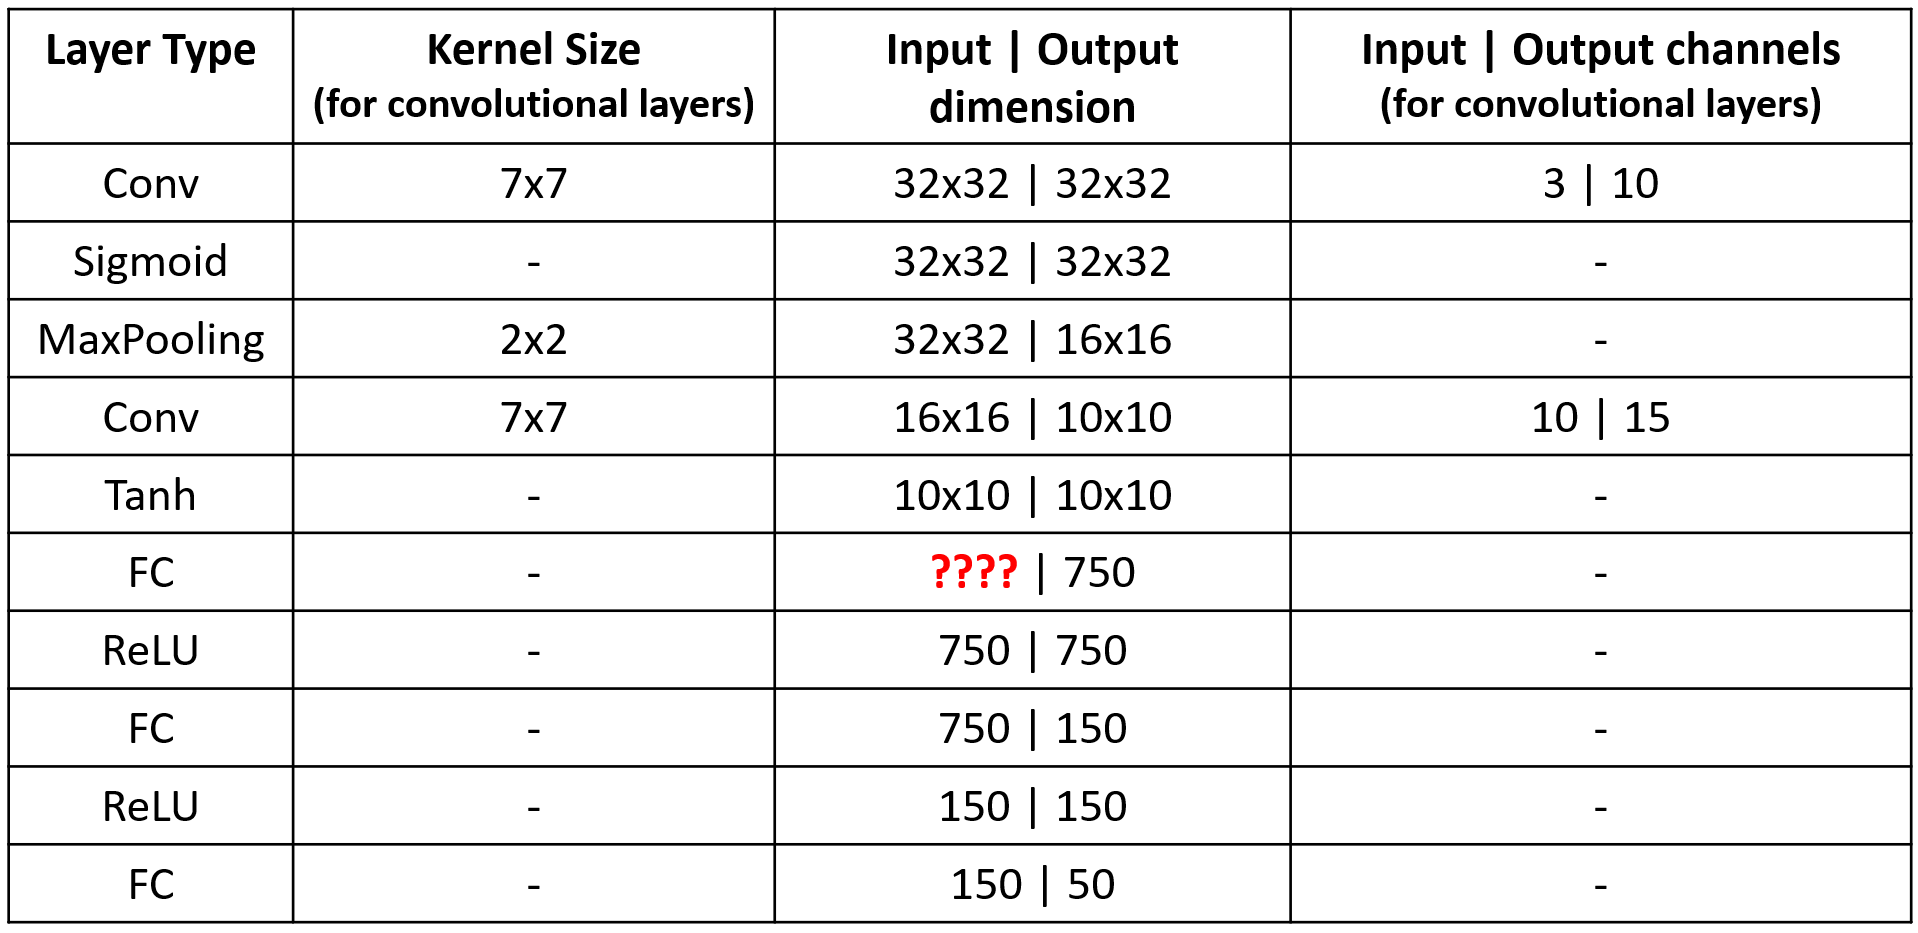

<font color='blue'>Nótese que el tamaño de entrada a la primera FC layer se marca con interrogantes. Esto se debe a que es el alumnado el que debe calcular el valor correspondiente y explicar el cálculo realizado.

<font color='blue'>Los alumnos deben:
1. Crear el código para el modelo *BaseNet* empleando fastai/PyTorch.
2. Explicar y describir cada una de las capas de la arquitectura *BaseNet*, así como las decisiones de implementación tomadas. Por ejemplo:
    - <font color='blue'>¿Qué función de pérdida se debería emplear: `CrossEntropyLoss()`, `CrossEntropyLossFlat()` o alguna otra?
    - ¿Se debería incorporar manualmente, en la definición de la red, la función de activación de la capa final (`nn.Softmax()`)? ¿Por qué?
    - ¿Cómo se ha calculado la dimensionalidad de entrada de la primera FC layer?
3. Desglosar detalladamente el número de parámetros de esta arquitectura, y cuánto contribuye cada capa a dicho número total. Se debe hacer un `summary()` del modelo para verificar que la arquitectura se ha construido adecuadamente y que el número de parámetros es correcto (es decir, se corresponde con lo calculado previamente).
4. Entrenar el modelo, sin aplicar la política de 1 ciclo de Leslie N. Smith, con _SGD_ (`lr=0.01`, `momentum=0.9`), e incluyendo _early stopping_ monitorizando la _loss_ en validación con una paciencia de $5$ durante $25$ épocas, y *batch size* de $128$ ejemplos. A continuación, se debe evaluar el rendimiento por medio de emplear/mostrar/analizar:
    - <font color='blue'>la matriz de confusión en entrenamiento, validación y test;
    - la _accuracy_ en entrenamiento, validación y test;
    - y la evolución, por épocas, tanto de la función de pérdida (en entrenamiento y validación) como de la _accuracy_ (en validación) y el _F1 score (Macro)_ (en validación).



In [3]:
# We get the CIFAR100 dataset
path = untar_data(URLs.CIFAR_100,force_download=True)

In [4]:
# The CIFAR_100 dataset, as well as the MNIST dataset, follows a common layout for machine learning datasets:
# separate folders for the training set and the validation set (and/or test set).
# Let's see what's inside both the training and test sets
print(path)
print(path.ls())
print((path/'train').ls())
print((path/'test').ls())
# train_classes = (path/'train').ls()
# test_classes = (path/'test').ls()
train_classes = sorted((path/'train').ls(), key=lambda p: p.name.casefold())
test_classes  = sorted((path/'test').ls(),  key=lambda p: p.name.casefold())
print([p.name for p in train_classes])  # <-- sorted names
print([p.name for p in test_classes])   # <-- sorted names
print(len(train_classes))

/root/.fastai/data/cifar100
[Path('/root/.fastai/data/cifar100/train'), Path('/root/.fastai/data/cifar100/test')]
[Path('/root/.fastai/data/cifar100/train/food_containers'), Path('/root/.fastai/data/cifar100/train/vehicles_1'), Path('/root/.fastai/data/cifar100/train/fish'), Path('/root/.fastai/data/cifar100/train/vehicles_2'), Path('/root/.fastai/data/cifar100/train/aquatic_mammals'), Path('/root/.fastai/data/cifar100/train/household_electrical_devices'), Path('/root/.fastai/data/cifar100/train/large_man-made_outdoor_things'), Path('/root/.fastai/data/cifar100/train/insects'), Path('/root/.fastai/data/cifar100/train/reptiles'), Path('/root/.fastai/data/cifar100/train/fruit_and_vegetables'), Path('/root/.fastai/data/cifar100/train/trees'), Path('/root/.fastai/data/cifar100/train/small_mammals'), Path('/root/.fastai/data/cifar100/train/medium_mammals'), Path('/root/.fastai/data/cifar100/train/large_carnivores'), Path('/root/.fastai/data/cifar100/train/household_furniture'), Path('/root/

Vemos que hay 20 clases, pero eso no debe confundirnos. Eso son solo las 20 superclases en que está subdividido el dataset. Véase https://github.com/fastai/dlcert2/blob/master/docs/datasets.md:
*"This dataset is just like the CIFAR-10, except it has 100 classes containing 600 images each. There are 500 training images and 100 testing images per class. **The 100 classes in the CIFAR-100 are grouped into 20 superclasses**. Each image comes with a "fine" label (the class to which it belongs) and a "coarse" label (the superclass to which it belongs)."*

In [5]:
# Queremos verificar que dentro de cada una de las 20 superclases hay 5 clases,
# lo que da las 100 clases que hay. También queremos verificar que el número de imágenes
# es correcto
print('Clases dentro de la primera superclase (',train_classes[0],'): ', train_classes[0].ls())
for i in range(20):
  print('Número de clases dentro de superclase ',i,': ', len(train_classes[i].ls()))
files_train = get_image_files(path/'train')
files_test = get_image_files(path/'test')
print('Total training images: ', len(files_train))
print('Total test images: ', len(files_test))

Clases dentro de la primera superclase ( /root/.fastai/data/cifar100/train/aquatic_mammals ):  [Path('/root/.fastai/data/cifar100/train/aquatic_mammals/dolphin'), Path('/root/.fastai/data/cifar100/train/aquatic_mammals/beaver'), Path('/root/.fastai/data/cifar100/train/aquatic_mammals/otter'), Path('/root/.fastai/data/cifar100/train/aquatic_mammals/seal'), Path('/root/.fastai/data/cifar100/train/aquatic_mammals/whale')]
Número de clases dentro de superclase  0 :  5
Número de clases dentro de superclase  1 :  5
Número de clases dentro de superclase  2 :  5
Número de clases dentro de superclase  3 :  5
Número de clases dentro de superclase  4 :  5
Número de clases dentro de superclase  5 :  5
Número de clases dentro de superclase  6 :  5
Número de clases dentro de superclase  7 :  5
Número de clases dentro de superclase  8 :  5
Número de clases dentro de superclase  9 :  5
Número de clases dentro de superclase  10 :  5
Número de clases dentro de superclase  11 :  5
Número de clases dentro

Ahora nos quedamos con $50$ clases / $10$ superclases (para evitar que no siempre se escojan las mismas, las fijamos manualmente al comienzo de la siguiente celda).

In [6]:
import shutil
keep_names = {'aquatic_mammals', 'fish', 'flowers', 'fruit_and_vegetables',
              'insects', 'large_carnivores',  'large_omnivores_and_herbivores',
              'reptiles', 'vehicles_1', 'vehicles_2'}
train_classes = sorted((path/'train').ls(), key=lambda p: p.name.casefold())
test_classes  = sorted((path/'test').ls(),  key=lambda p: p.name.casefold())

print('SUPERCLASES ELIMINADAS:')
print('Training Set: ')
for p in train_classes:
    if p.name not in keep_names:
        print(p)
        shutil.rmtree(p)
print('Test Set: ')
for p in test_classes:
    if p.name not in keep_names:
        print(p)
        shutil.rmtree(p)

print('SUPERCLASES CONSERVADAS:')
print('Training Set: ')
for p in train_classes:
    if p.name in keep_names:
        print(p)
print('Test Set: ')
for p in test_classes:
    if p.name in keep_names:
        print(p)


SUPERCLASES ELIMINADAS:
Training Set: 
/root/.fastai/data/cifar100/train/food_containers
/root/.fastai/data/cifar100/train/household_electrical_devices
/root/.fastai/data/cifar100/train/household_furniture
/root/.fastai/data/cifar100/train/large_man-made_outdoor_things
/root/.fastai/data/cifar100/train/large_natural_outdoor_scenes
/root/.fastai/data/cifar100/train/medium_mammals
/root/.fastai/data/cifar100/train/non-insect_invertebrates
/root/.fastai/data/cifar100/train/people
/root/.fastai/data/cifar100/train/small_mammals
/root/.fastai/data/cifar100/train/trees
Test Set: 
/root/.fastai/data/cifar100/test/food_containers
/root/.fastai/data/cifar100/test/household_electrical_devices
/root/.fastai/data/cifar100/test/household_furniture
/root/.fastai/data/cifar100/test/large_man-made_outdoor_things
/root/.fastai/data/cifar100/test/large_natural_outdoor_scenes
/root/.fastai/data/cifar100/test/medium_mammals
/root/.fastai/data/cifar100/test/non-insect_invertebrates
/root/.fastai/data/cifar

Ahora intentamos verificar si las hemos eliminado realmente.

In [7]:
print(path)
train_classes = (path/'train').ls()
test_classes = (path/'test').ls()
print(len(train_classes))
print(len(test_classes))

/root/.fastai/data/cifar100
10
10


Y que el número de ejemplos en training y test es el correcto.

In [8]:
print('Clases dentro de la primera superclase (',train_classes[0],'): ', train_classes[0].ls())
files_train = get_image_files(path/'train')
files_test = get_image_files(path/'test')
print('Total training images: ', len(files_train))
print('Total test images: ', len(files_test))

Clases dentro de la primera superclase ( /root/.fastai/data/cifar100/train/vehicles_1 ):  [Path('/root/.fastai/data/cifar100/train/vehicles_1/train'), Path('/root/.fastai/data/cifar100/train/vehicles_1/bicycle'), Path('/root/.fastai/data/cifar100/train/vehicles_1/pickup_truck'), Path('/root/.fastai/data/cifar100/train/vehicles_1/bus'), Path('/root/.fastai/data/cifar100/train/vehicles_1/motorcycle')]
Total training images:  25000
Total test images:  5000


Podemos observar que ahora tenemos el dataset tal y como nos interesa, con $25000$ imágenes de entrenamiento y $5000$ de test.

Ahora vamos a proceder a cargar los datos de entrenamiento. Para ello hacemos uso de DataLoaders y DataBlock.

En este apartado debemos de aclarar en que consiste la función del DataBlock, y dataLoader.

El datablock es una plantilla que define la estructura que van a tener los datos del modelo, y cómo se han de transformar. Sigue la siguiente estructura:

    blocks: Define el tipo de datos que se van a utilizar (Esto implica qué
    transformaciones se han de hacer en caso de imagenes, o en caso de las
    salidas, utilizando one-hot encoding para los casos de clasificación)

    get_items: Se especifica la forma de encontrar los archivos. En este caso
    con la función get_image_files, la cual busca recursivamente archivos de imagen.

    splitter: Determina como se debe de hacer la división de los datos de
    entrenamiento y validación, en este caso utilizando una division aleatoria
    de un 10% para validación.

    get_y: Especifica cómo se ha de extraer la etiqueta de cada ítem, en este
    caso de parent_label, el cual devolvería el nombre de la carpeta padre de
    los datos, que correspondería con la clase en cuestión en función de cómo
    estan organizados los datos.

    item_tfms: Son las tranformaciones aplicadas a los datos antes del batch,
    en este caso hacemos un resize(32) para asegurarnos que las imagenes tengan
    la dimension 32x32, aunque estas ya las tengan.


Por otro lado, tenemos el dataloader, es el que se encarga de cargar los datos reales, organizandolo en batches, y aplica las transformaciones definidas en el datablock. Siendo path/'train' la ruta de los datos, bs=128 el tamaño del batch, y num_workers que especifica el numero de procesos en paralelo, aprovechando en este caso todos los nucleos de la cpu.

Numero de ejemplos de entrenamiento (una vez descartados los de validacion): 22500
Numero de ejemplos de validacion: 2500


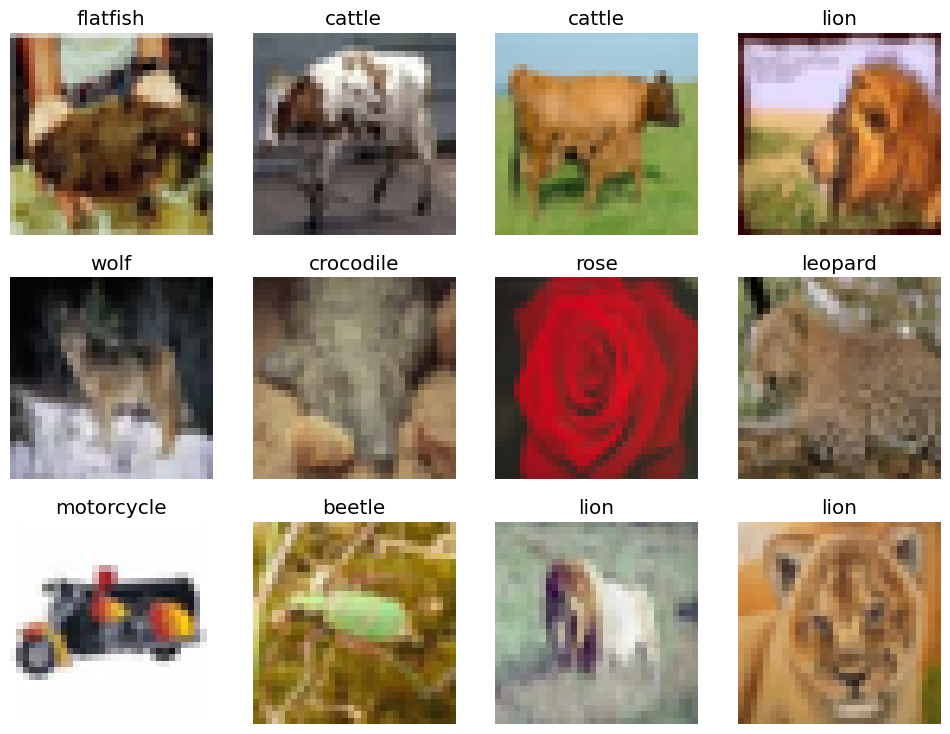

In [9]:
CIFAR_50 = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.1,seed=42),
    get_y=parent_label,
    item_tfms=Resize(32)
)

dls = CIFAR_50.dataloaders(path/'train',bs=128,num_workers=os.cpu_count())

dls.show_batch(max_n=12)

print('Numero de ejemplos de entrenamiento (una vez descartados los de validacion):', len(dls.train_ds))
print('Numero de ejemplos de validacion:', len(dls.valid_ds))

Example of training data


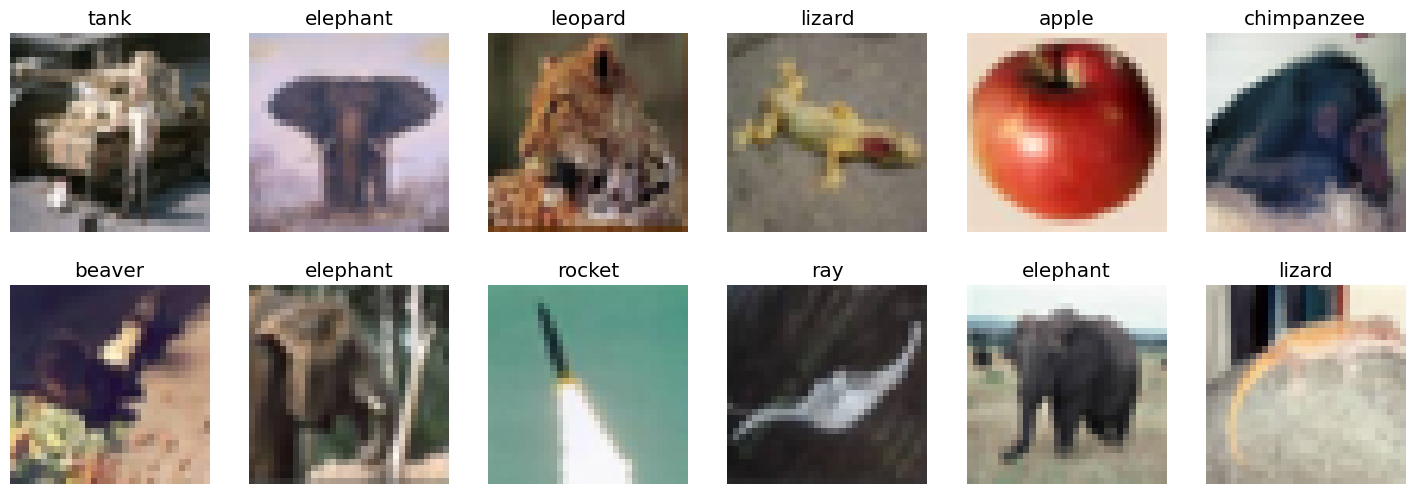

In [10]:
print('Example of training data')
dls.train.show_batch(max_n=12, nrows=2)

Example of validation data


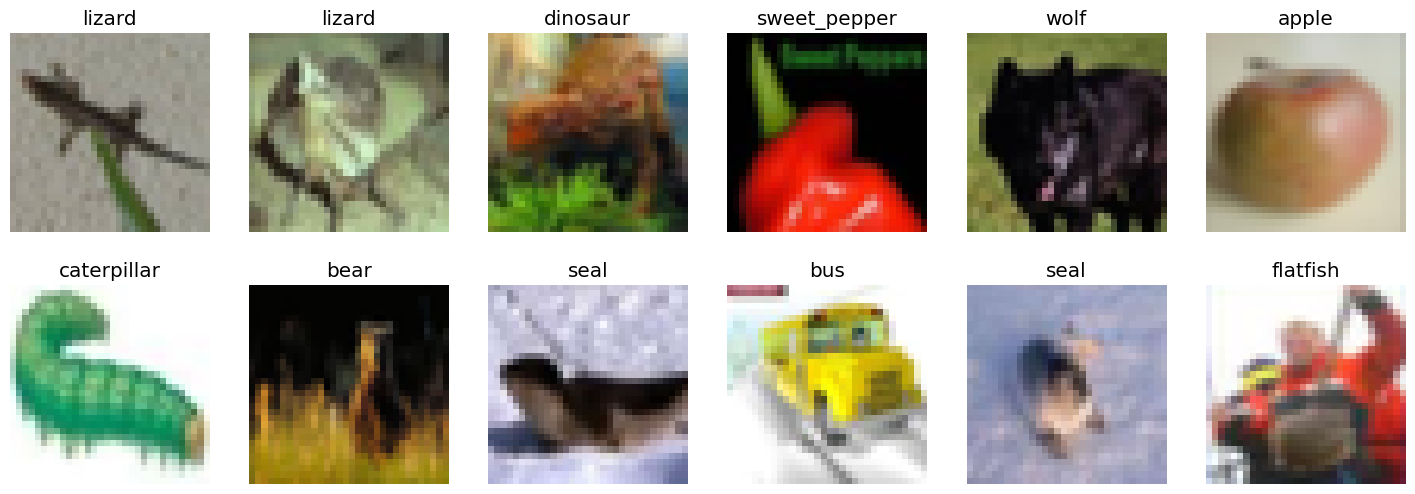

In [11]:
print('Example of validation data')
dls.valid.show_batch(max_n=12, nrows=2)

Ahora procedemos con la creación de la red BaseNet.

##  1.Creacion del modelo

In [12]:

BaseNet = sequential(
    nn.Conv2d(in_channels=3, out_channels=10, kernel_size=(7,7), padding=3),
    nn.Sigmoid(),
    nn.MaxPool2d(kernel_size=2, stride=2),
    nn.Conv2d(in_channels=10, out_channels=15, kernel_size=7, padding=0),
    nn.Tanh(),
    nn.Flatten(),
    nn.Linear(1500, 750),
    nn.ReLU(),
    nn.Linear(750, 150),
    nn.ReLU(),
    nn.Linear(150, 50)
)

BaseNet

Sequential(
  (0): Conv2d(3, 10, kernel_size=(7, 7), stride=(1, 1), padding=(3, 3))
  (1): Sigmoid()
  (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (3): Conv2d(10, 15, kernel_size=(7, 7), stride=(1, 1))
  (4): Tanh()
  (5): Flatten(start_dim=1, end_dim=-1)
  (6): Linear(in_features=1500, out_features=750, bias=True)
  (7): ReLU()
  (8): Linear(in_features=750, out_features=150, bias=True)
  (9): ReLU()
  (10): Linear(in_features=150, out_features=50, bias=True)
)

## 2.Explicación del modelo

Primero vamos a aclarar qué es una red neuronal en sí misma.

Una red neuronal principalmente consiste en un modelo computacional que está inspirado en el cerebro humano, diseñado para aproximas funciones complejas y aprender patrones a partir de datos.

Estan formadas por:
- Neuronas: Simula el comportamiento de una neuronal real, recibiendo entradas de neuronas anteriores, y calcula una combinacion lineal de estas entradas usando pesos.
- Capas: Son conjuntos de neuronas, para una red neuronal se suelen crear varias capas donde cada capa obtienen las entradas de la capa anterior, excepto la primera que obtendría la información directa de los datos.
- Conexiones: Las neuronas se conectan a otras neuronas de la siguiente capa mediante los pesos, que es simplemente un valor que se le multiplica al valor de la neuronal, el cual se aprende durante el entrenamiento.

Vamos a explicar la función de cada capa de este modelo BaseNet:

- Conv: Aplica un filtro de convolución con un kernel 7x7, con 3 canales de entrada y 10 canales de salida. Esto tiene la intención de extraer 10 característitas. Además, se debe utilizar un padding=3 ya que el modelo indica que debe mantener la dimensión, por lo que al ser el kernel de 7x7 debemos de añadir a cada lado de la imagen 3 filas de 0s.

- Sigmoid: Se trata de una capa que aplica la función sigmoide a cada neurona
$$
σ(x) = \frac{1}{1+ e^{-x}}
$$
 De esta manera conseguimos introducir no linealidad al modelo, ya que si no ponemos ninguna función de activación no lineal, el modelo se podría comprimir en un conjunto de operaciónes lineales, limitándonos la complejidad de las cosas que nos interesa que la red aprenda.

  Además también, por cómo es la función sigmoide, nos acota el rango de valores de las neuronas a [0,1]. Esto puede crear un problema conocido como el gradiente desvanecido, que consiste en que los valores de los gradientes en las regiones cercanas a 0 o a 1 son muy cercanos a 0, pero para ello mas adelante se evita este problema.

- MaxPooling: Esta capa consiste simplemente en hacer una operación de submuestreo, en este caso siendo la dimensión 2x2 nos indica que va a iterar por todas las imágenes quedándose con el máximo de todas las regiones 2x2 de cada imagen.

  Esto consigue reducir el coste computacional de la red ya que reduce el tamaño espacial a la mitad sin perder gran cantidad de la información.
  
- Conv: Esta es otra capa de convolución, solo que en este caso la dimensión pasa de 16x16 a 10x10, lo que nos indica que para un kernel de 7x7 no se ha aplicado padding, de ahí que perdemos 3 píxeles a cada lado de la imagen. También pasamos de 10 canales a 15, extrayendo así más características.

- Tanh: Aquí tenemos otra función de activación, la cual en este caso se trata de la aplicación del funcion tangencial hiperbólica, la cual es la siguiente
$$
tanh(x) = \frac{e^x - e^{-x}}{e^x + e^{-x}}  
$$

  Esta función ademas de introducir también no linealidad, cambia el rango de valores de las neuronas, pasando a [-1,1], incluyendo así números negativos.
  Esto nos consigue que la gran parte de las neuronas tengan valores cercanos a 0, lo que facilita el flujo de gradiente en comparación con la sigmoide.

- Flatten: Esta capa se encarga de "aplanar" las neuronas, pasando de operar previamente con matrices con dimension 10x10x15(channels) a operar con un vector unidimensional de 1500, unificando todo para poder operar de manera conjunta posteriormente.

- Fully Connected(Linear): Esta capa es una capa conocida como capa densa, la cual se encarga de conectar cada neurona con todas las neuronas siguientes con pesos aprendibles. Aquí partimos de 1500 neuronas, y reducimos la salida a 750, con el objetivo de ir reduciendo la dimensionalidad e ir unificando las principales características. Como bien hemos explicado antes, cada neurona resultande es calculada a partir de una combinación lineal de las neuronas de la capa anterior.

- ReLU: Tras la primera capa FC, se aplica una función de activación Rectified Linear Unit, que esta definida de la siguiente manera:
$$
ReLU(x) = max(0,x)
$$

  Esta, al no ser lineal tampoco, introduce también no linealidad al modelo, pero a diferencia de la sigmoide o la tanh, no tiene un problema tan severo de gradiente desvanecido. También, estamos eliminando todos los valores negativos, lo que ayuda a que el aprendizaje sea más estable y rápido.

- Fully Connected (Linear): En este caso es otra capa densa, solo que reducimos la dimensionalidad de 750 neuronas como entrada a 150 neuronas como salida.

- ReLU: Volvemos a aplicar ReLU rompiendo la linealidad creada por la capa densa.

- Fully Connected(Linear): Por último aplicamos la última capa densa, que termina de reducir la dimensionalidad de 150 a 50, que corresponde con las 50 clases que tiene el problema. La cantidad de salidas debe de ser necesariamente igual a la cantidad de clases, ya que así podemos interpretar la salida de forma directa.



###¿Qué función de pérdida se debería emplear: `CrossEntropyLoss()`, `CrossEntropyLossFlat()` o alguna otra?

Vamos primero a concretar en qué consiste CrossEntropyLoss() y CrossEntropyLossFlat().

- CrossEntropyLoss: Se trata de una función de pérdida, que espera logits sin normalizar, calcula softmax y por ultimo el error.

  El cálculo de softmax basicamente se encarga de normalizar las entradas, transformando los valores en una serie de probabilidades, cuya suma total es 1. Esta es la función softmax:

  $$
  p_i = \frac{e^{z_i}}{∑_je^{z_i}}
  $$

  Donde $z_i$ es el logit de la clase i.

  Luego posteriormente se calcula la pérdida logarítmica de esta manera.
  $$
  Loss = -log(p_{correcta})
  $$

  Obteniendo finalmente el error. También, si se le pasa como parametro a la función un vector de pesos del tamaño de las clases, se le aplica el peso correspondiente a el error de la clase correcta en cuestión.

- CrossEntropyLossFlat: Esta función de pérdida hace exactamente lo mismo que la anterior, solo que se encarga automáticamente de aplanar los tensores de salida si sus dimensiones no coinciden exactamente con las etiquetas. Esto previene errores de forma (shape mismatch) muy comunes al conectar CNNs con las etiquetas.

En cuanto a la respuesta a la pregunta principal, es indiferente si utilizamos una función u otra, ya que ninguna de estas nos va a generar problemas en cuanto a la representación de los datos, y el cálculo de la pérdida al ser el mismo no va ha haber diferencia en cuanto a resultados.

### ¿Se debería incorporar manualmente, en la definición de la red, la función de activación de la capa final (`nn.Softmax()`)? ¿Por qué?

Mi respuesta es no. Debido a que como bien hemos explicado en el apartado del CrossEntropyLoss, si aplicamos esta función de pérdida, esta ya tiene en su implementación interna el softmax aplicado, por lo que podemos pasarle unas entradas sin normalizar y esta internamente calcularía su normalización.

En caso de utilizar otra función de pérdida dependería del caso en cuestión.

### ¿Cómo se ha calculado la dimensionalidad de entrada de la primera FC layer?

El calculo consiste en: ver que la dimensión de los datos previos a la primera FC layer es 10x10x15, 10x10 correspondiente a la dimensión de la imagen, y 15 del numero de canales de la salida resultante de la previa capa de convolución. Por lo tanto, como para la FC necesitamos aplanar, el aplanado consiste en pasar de dimension batch_sizex10x10x15 a batch_sizex1500, basicamente calculando la multiplicación de cada dimension.

## 3.Desglose del número de parámetros de la arquitectura, y cuánto contribuye cada capa a dicho número total

Vamos a ir capa por capa calculando el número de parámetros, vamos a obviar las funciones de activacion, y las capas de flatten y maxpool ya que estas son meras operaciones de las que no se aprenden parámetros:

- Conv 1: 7x7x3 son el tamaño de los filtros de entrada + 1 de bias, por lo tanto de aqui son 148 parametros, a esto se le multiplica por 10 que son los filtros de salida, ya que cada filtro aprende un patron distinto. Por lo tanto nos quedan 1480 parámetros.
- Conv 2: 7x7x10 + 1 bias de los filtros de entrada, todo esto multiplicado por 15 de los filtros de salida. Esto nos da 7365.

- FC 1: La entrada tiene dimensión 1500 + 1 de bias, y a esto se le multiplica por 750 que es la dimensión de salida. Esto nos da 1125750.
- FC 2: La entrada es 750+1, todo esto por la salida que es 150. Resultado: 112650.
- FC 3: Entrada 150+1, multiplicado por la salida que es 50. Obtenemos 7550.

Aclaración: El bias es un parametro extra que se le añade a cada neurona de entrada, este parámetro es aprendible por la red y permite que una neurona se active aunque la suma de sus pesos sea 0, permitiendo que aprenda patrones más complejos.

Vamos ahora a ver el summary() de nuestro modelo para ver que coinciden nuestro cálculo de los parámetros y que és correcto el modelo.

In [13]:
learn=Learner(dls, BaseNet, metrics=accuracy)
learn.summary()

Sequential (Input shape: 128 x 3 x 32 x 32)
Layer (type)         Output Shape         Param #    Trainable 
                     128 x 10 x 32 x 32  
Conv2d                                    1480       True      
Sigmoid                                                        
____________________________________________________________________________
                     128 x 10 x 16 x 16  
MaxPool2d                                                      
____________________________________________________________________________
                     128 x 15 x 10 x 10  
Conv2d                                    7365       True      
Tanh                                                           
____________________________________________________________________________
                     128 x 1500          
Flatten                                                        
____________________________________________________________________________
                     128 x 750  

Como se esperaba, el cálculo de los parámetros es correcto y el modelo parece coincidir de manera correcta con el modelo BaseNet que nos pedían.

## 4.Entrenamiento del modelo

Como bien nos piden, debemos de utilizar el optimizador SGD con un learning rate de 0.01 y un momemtum de 0.9. Vamos a explicar en que consiste este optimizador y qué es el learning rate y momentum:

- SGD (Stochastic Gradient Descent): Este algoritmo se trata de un algoritmo de optimización, cuyo objetivo es minimizar la función de pérdida del modelo ajustando los pesos de manera iterativa.
La actualización de esta función sin momentum se define como:
$$
w_{t+1} = w_t + \eta ⋅ \nabla L(w_t)
$$

donde: $w_t$ es el peso en cuestión, $\eta$ es el learning rate y $\nabla L(w_t)$ es el gradiente de la función de pérdida respecto a los pesos.

Como podemos deducir, el gradiente es una constante que multiplica al gradiente, la cual controla qué tan grande es el saloto que damos en la dirección del gradiente. Este parámetro es muy importante, ya que un valor muy grande nos puede crear saltos muy grandes y conseguir alejarnos del minimo de la función, y uno muy pequeño puede tardar demasiado o no encontrar el minimo de la función quedando en un minimo local.

Por otro lado tenemos el momentum, el cual es un parametro creado para ayudar a acelear el entrenamiento e incluso hacer que salga de minimos locales.

Consiste en el concepto de inercia, los pesos pasan a depender no solo del gradiente actual, si no de la direccion y magnitud de los gradientes anteriores. La fórmula con momentum es:

$$
Δw_{t+1} = β ⋅ Δw_t + η ⋅ ∇ L(w_t)
$$
$$
w_{t+1} = w_t + Δw_t
$$

Siendo $Δw$ la velocidad acumulada del gradiente, $β$ el momentum, y $η$ la tasa de aprendizaje.

También aplicamos un earlystopping con paciencia 5 como bien nos piden. Este método se encarga de ir revisando las metricas obtenidas durante el entrenamiento en el conjunto de datos de la validación, y para la ejecución cuando las metricas correspondientes a la validación no mejoran tras 5 épocas (paciencia).

Finalmente creamos el Learner(), el cual se encarga de todo el papel correspondiente a la integracion del modelo con los datos, y con el metodo fit() que ejecuta la red neuronal y aplica la función de optimización para la actualización de los pesos con respecto al error, de manera recursiva hasta completar las epocas o hasta que ocurra un callback del earlystopping.

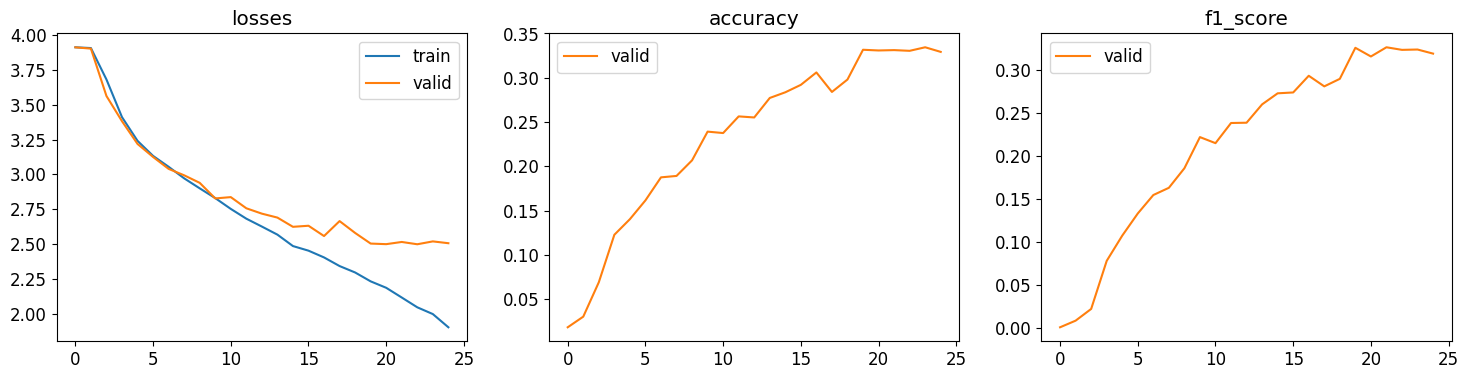

In [14]:
from fastai.optimizer import SGD
from fastai.test_utils import *
from fastai.callback.tracker import EarlyStoppingCallback

earlystopping = EarlyStoppingCallback(monitor='valid_loss', patience=5)
opt_func = partial(SGD, lr=0.01, mom=0.9)

dls = CIFAR_50.dataloaders(path/'train',bs=128)
learn = Learner(
    dls,
    BaseNet,
    loss_func=nn.CrossEntropyLoss(),
    metrics=[accuracy, F1Score(average='macro')],
    opt_func=opt_func,
    cbs=earlystopping
)


learn.fit(25)
learn.recorder.plot_metrics()

Como vemos, el entrenamiento ha parado en la epoca 24, demanera correcta, debido al early stopping, ya que el accuracy del conjunto de validación estaba empezando a estancarse alrededor del 0.32.

### Evolucion por epocas y analisis de metricas en entrenamiento, validacion y test

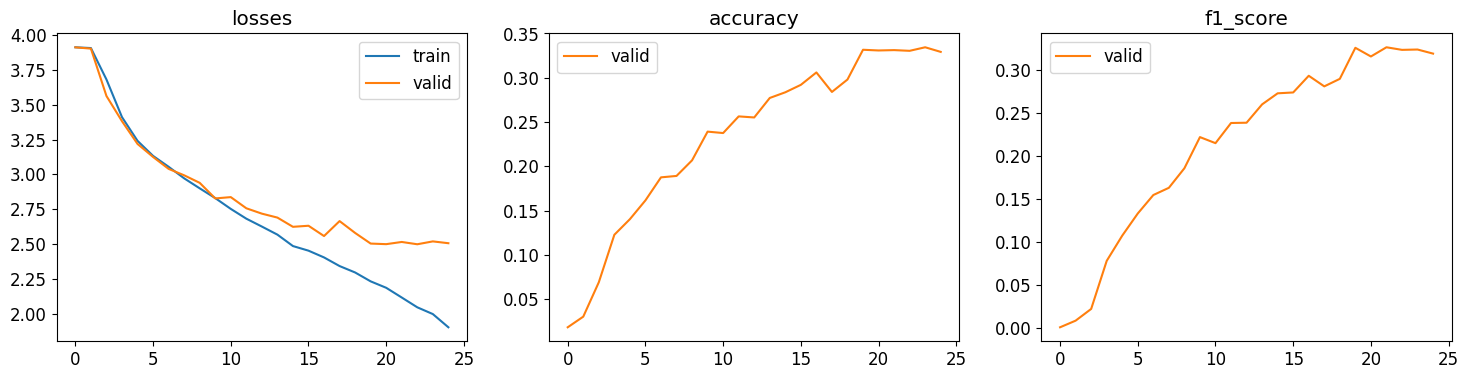

Train accuracy:  49.1778 %
Validation accuracy:  32.92 %
Test accuracy:  33.66 %


In [15]:

learn.recorder.plot_metrics()
test_dl = learn.dls.test_dl(files_test,with_labels=True)

preds_train, targs_train, _ = learn.get_preds(dl=learn.dls.train, with_decoded=True)
preds_val, targs_val, _ = learn.get_preds(dl=learn.dls.valid, with_decoded=True)
preds_test, targs_test, _ = learn.get_preds(dl=test_dl, with_decoded=True)

acc_train = accuracy(preds_train, targs_train)
acc_val = accuracy(preds_val, targs_val)
acc_test = accuracy(preds_test, targs_test)
print('Train accuracy: ', round(float(acc_train)*100, 4), '%')
print('Validation accuracy: ', round(float(acc_val)*100, 4), '%')
print('Test accuracy: ', round(float(acc_test)*100, 4), '%')

En estas gráficas podemos ver la evolucion por épocas de la función de pérdida, del accuracy y del f1 score.

Como podemos ver, el entrenamiento ha ocurrido de manera normal, es decir, el modelo ha ido aprendiendo a medida que avanzaban las épocas y reduciendo su error, tanto en el conjunto de entrenamiento como el en conjunto de validación, pero a partir de la época 12, el conjunto de validación ha empezado a tener peor rendimiento, lo cual es completamente normal.

El problema viene cuando el rendimiento en validación empeiza a estancarse a partir de la época 20, lo cual nos indica que si seguimos entrenando vamos a hacer overfitting, es decir, que vamos a ir mejorando el modelo para el conjunto de datos de entrenamiento, pero no nos sirve ya que no mejoraremos fuera de la muestra, de ahí el callback de early stopping, ya que se terminó la paciencia de 5 y por lo tanto la ejecución se corta.

Por otro lado tenemos el accuracy y el f1 score, métricas las cuales nos dan valores bastante bajos, de entorno a un 0.35. Por otro lado, al igual que en la gráfica de la función de pérdida, el accuracy y el f1-score van mejorando conforme pasan las epocas hasta llegar a los puntos finales donde ocurre el ligero estancamiento.

En cuanto a la comparación de las metricas en función del conjunto de entrenamiento, tenemos:

    Train accuracy:  50.5111 %
    Validation accuracy:  33.4 %
    Test accuracy:  34.18 %

Vemos como el rendimiento en test es bastante parecido al del conjunto de validación, lo cual es lo que debería de ocurrrir, y nos confirma que no hemos cometido leak de datos en el entrenamiento ni nada.

Por otro lado vemos como la precision en el conjunto de entrenamiento es notoriamente mejor, lo cual no es raro ya que el modelo esta aprendiendo directamente de los datos de entrenamiento y es lógico que al generalizar tenga peores resultados.

### Matriz de confusion del entrenamiento, validacion y test

Para las matrices de confusion, he implementado la funcion confusion_matrix_plot(learn,dl,name), la cual obtiene las predicciones del modelo a partir del dataLoader dl, transformamos esos datos a numpy(), y creamos la matriz de confusion utilizando la importada por sklearn. Luego posteriormente utilizamos ConfusionMatrixDisplay, que se encarga de la parte visual de la matriz.

Por otro lado también calculamos las 10 peores clases en cuanto a predicciones, calculando el porcentaje de aciertos respecto al total de cada clase.

In [16]:
def confusion_matrix_plot(learn, dl, name):
  preds, targs = learn.get_preds(dl=dl)

  # Si eso falla, volvemos a la implementación que usa los valores calculados:
  from fastai.interpret import ClassificationInterpretation
  from sklearn.metrics import confusion_matrix
  import numpy as np

  print(f"\n--- Evaluando: {name} ---")

  pred_clases = preds.argmax(dim=1).cpu().numpy()
  targs_numpy = targs.cpu().numpy()

  # B. Calcular la matriz de confusión con SKLearn
  cm = confusion_matrix(targs_numpy, pred_clases)

  # C. Graficar usando una función auxiliar (si la tuya sigue fallando)
  # Para graficar, puedes usar el objeto de sklearn y matplotlib:
  from sklearn.metrics import ConfusionMatrixDisplay
  import matplotlib.pyplot as plt
  import numpy as np

  class_accuracy = cm.diagonal() / cm.sum(axis=1)
  worst_classes_idx = np.argsort(class_accuracy)[:10]

  worst_classes_acc = class_accuracy[worst_classes_idx]

  print("Peores 10 clases (índice y exactitud):")
  for idx, acc in zip(worst_classes_idx, worst_classes_acc):
      print(f"Clase {idx}: {acc:.2f}")


  disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                                display_labels=learn.dls.vocab)
  fig, ax = plt.subplots(figsize=(16, 16))

  # 1. Plotear la matriz
  disp.plot(cmap=plt.cm.Blues, ax=ax)

  ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='right') # Rotación de 90 grados
  plt.tight_layout()

  plt.title('Confusion Matrix for the {}'.format(name))
  plt.show()

Hecha esta función, la vamos a utilizarla para la creación de las tres matrices de confusión. Utilizamos los dataloaders creados por el learn, para train y valid, y para el de test tenemos que crearlo manualmente con learn.dls.test_dl(files_test, with_labels=True).


--- Evaluando: Entrenamiento (Train) ---
Peores 10 clases (índice y exactitud):
Clase 28: 0.11
Clase 46: 0.14
Clase 35: 0.15
Clase 2: 0.22
Clase 23: 0.23
Clase 37: 0.30
Clase 47: 0.31
Clase 21: 0.37
Clase 30: 0.37
Clase 3: 0.38


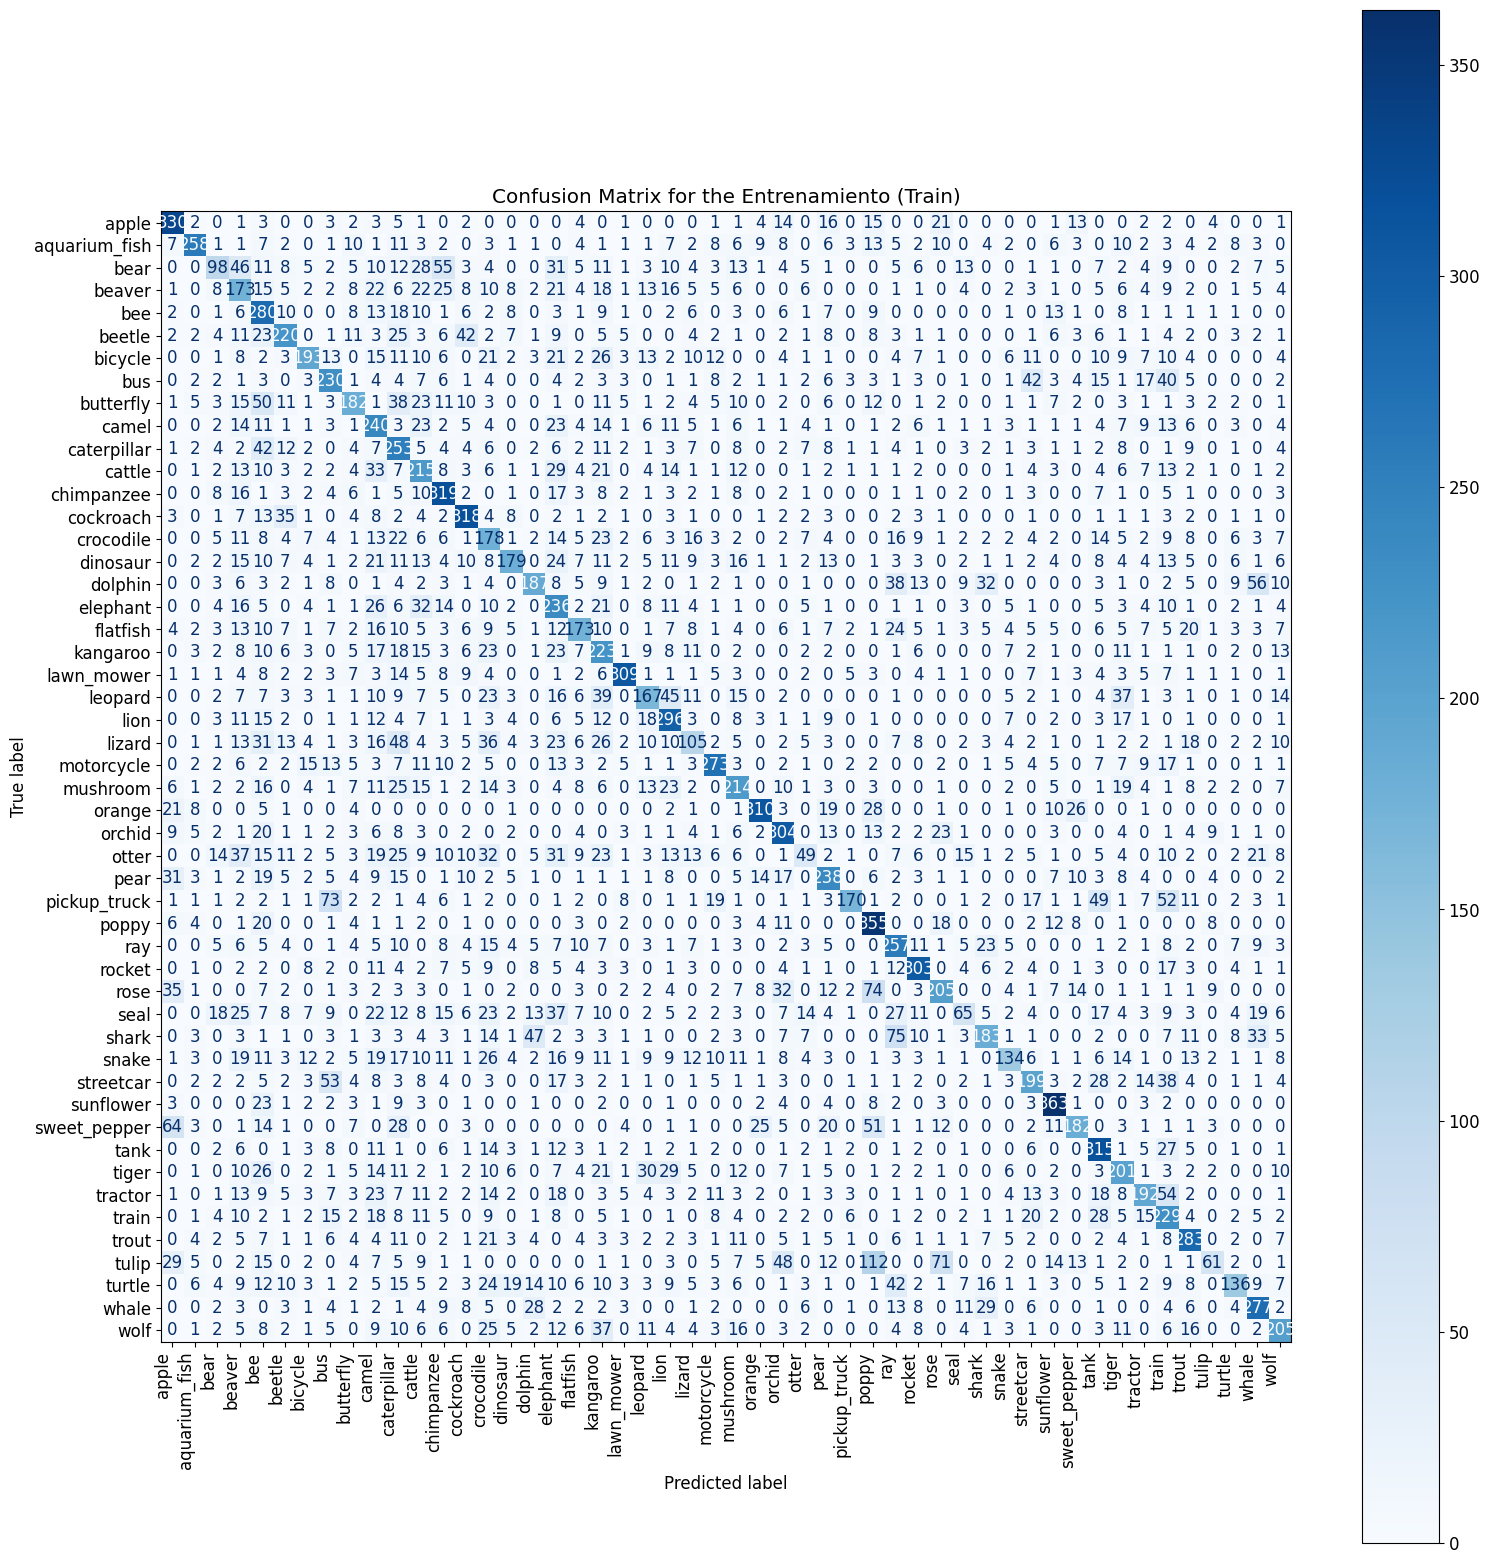

In [17]:
# Dataloaders
train_dl = learn.dls.train

# Display
confusion_matrix_plot(learn, train_dl, "Entrenamiento (Train)")


--- Evaluando: Validación (Validation) ---
Peores 10 clases (índice y exactitud):
Clase 46: 0.02
Clase 28: 0.04
Clase 35: 0.06
Clase 47: 0.09
Clase 37: 0.11
Clase 15: 0.14
Clase 2: 0.15
Clase 38: 0.15
Clase 49: 0.18
Clase 23: 0.20


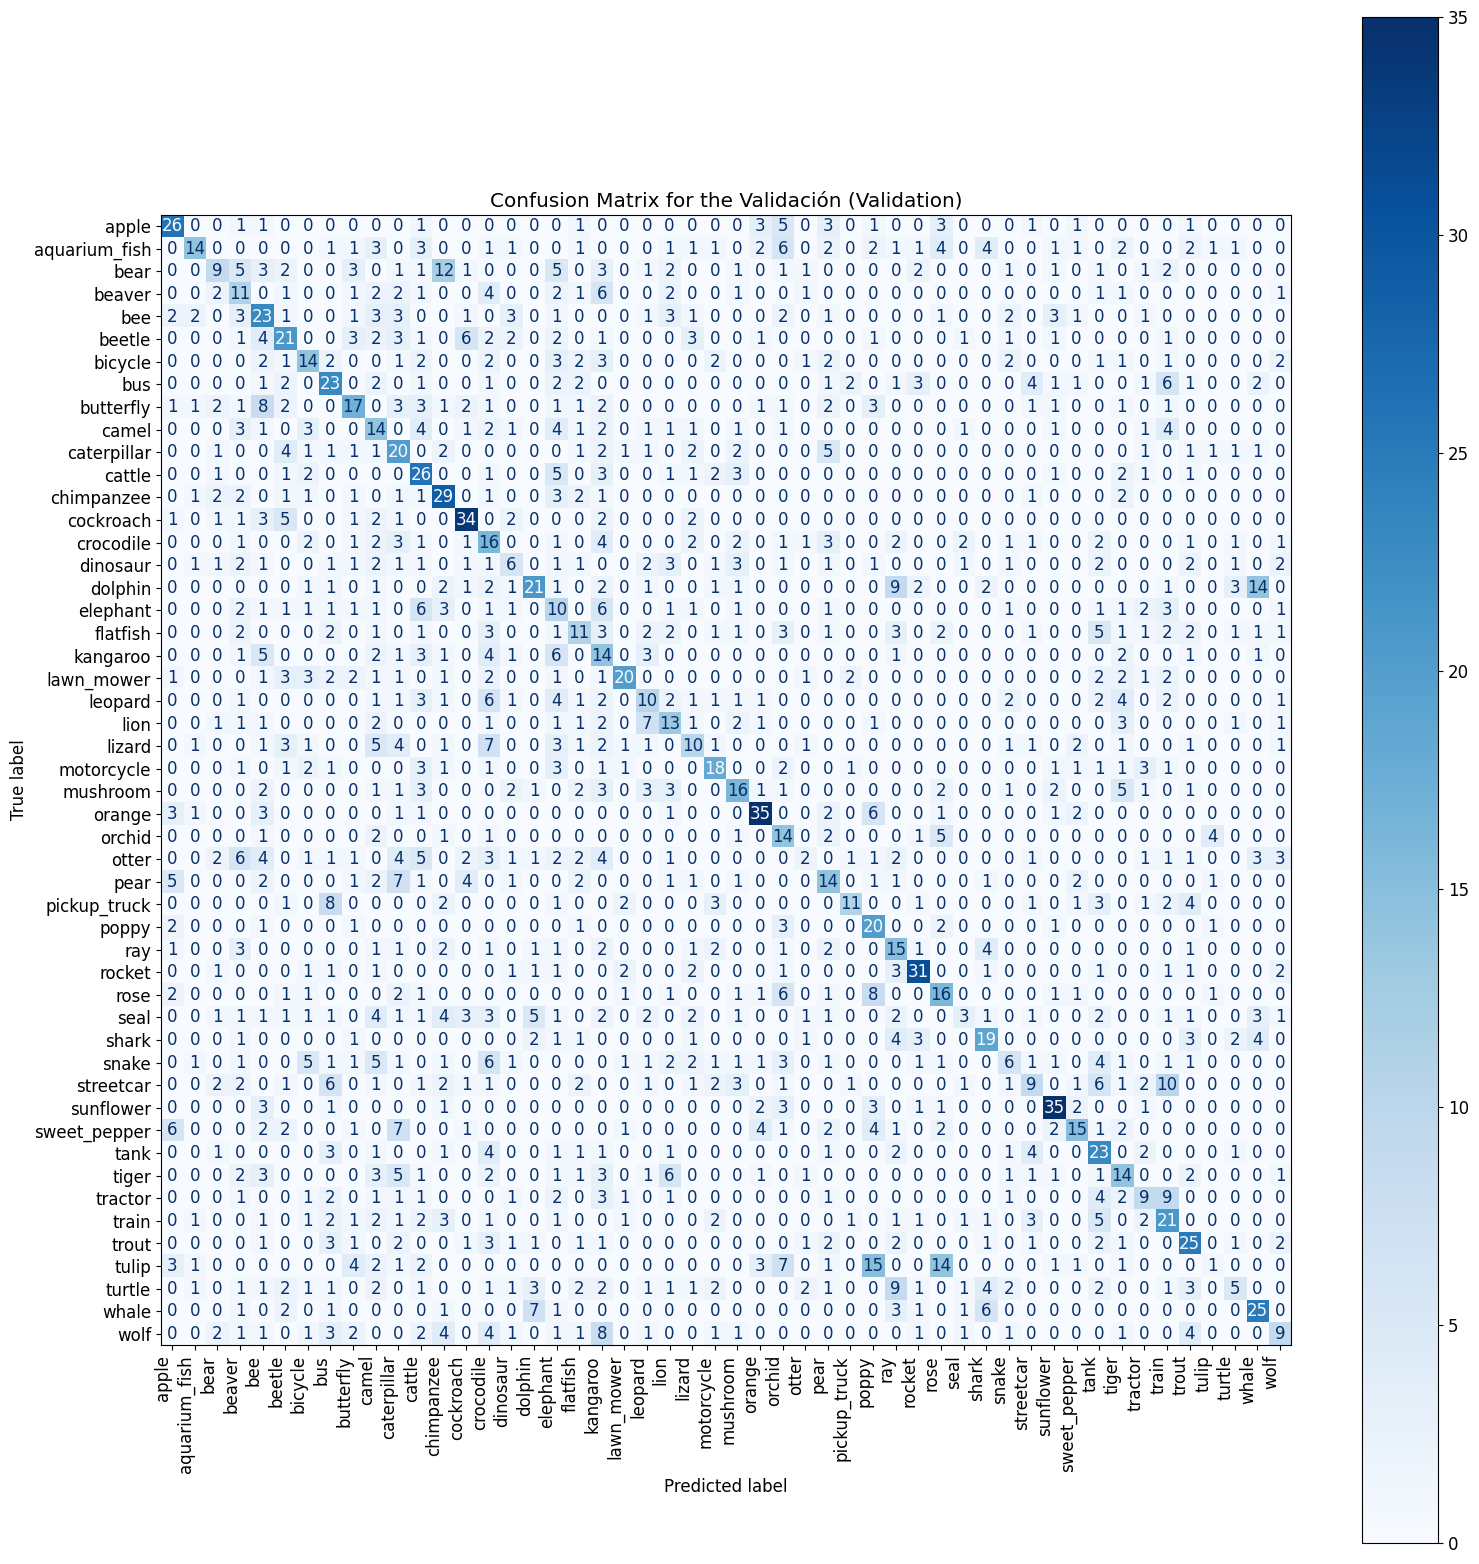

In [18]:
valid_dl = learn.dls.valid

confusion_matrix_plot(learn, valid_dl, "Validación (Validation)")


--- Evaluando: Prueba (Test) ---
Peores 10 clases (índice y exactitud):
Clase 28: 0.04
Clase 35: 0.05
Clase 46: 0.08
Clase 2: 0.08
Clase 37: 0.14
Clase 23: 0.17
Clase 47: 0.18
Clase 30: 0.18
Clase 11: 0.20
Clase 8: 0.20


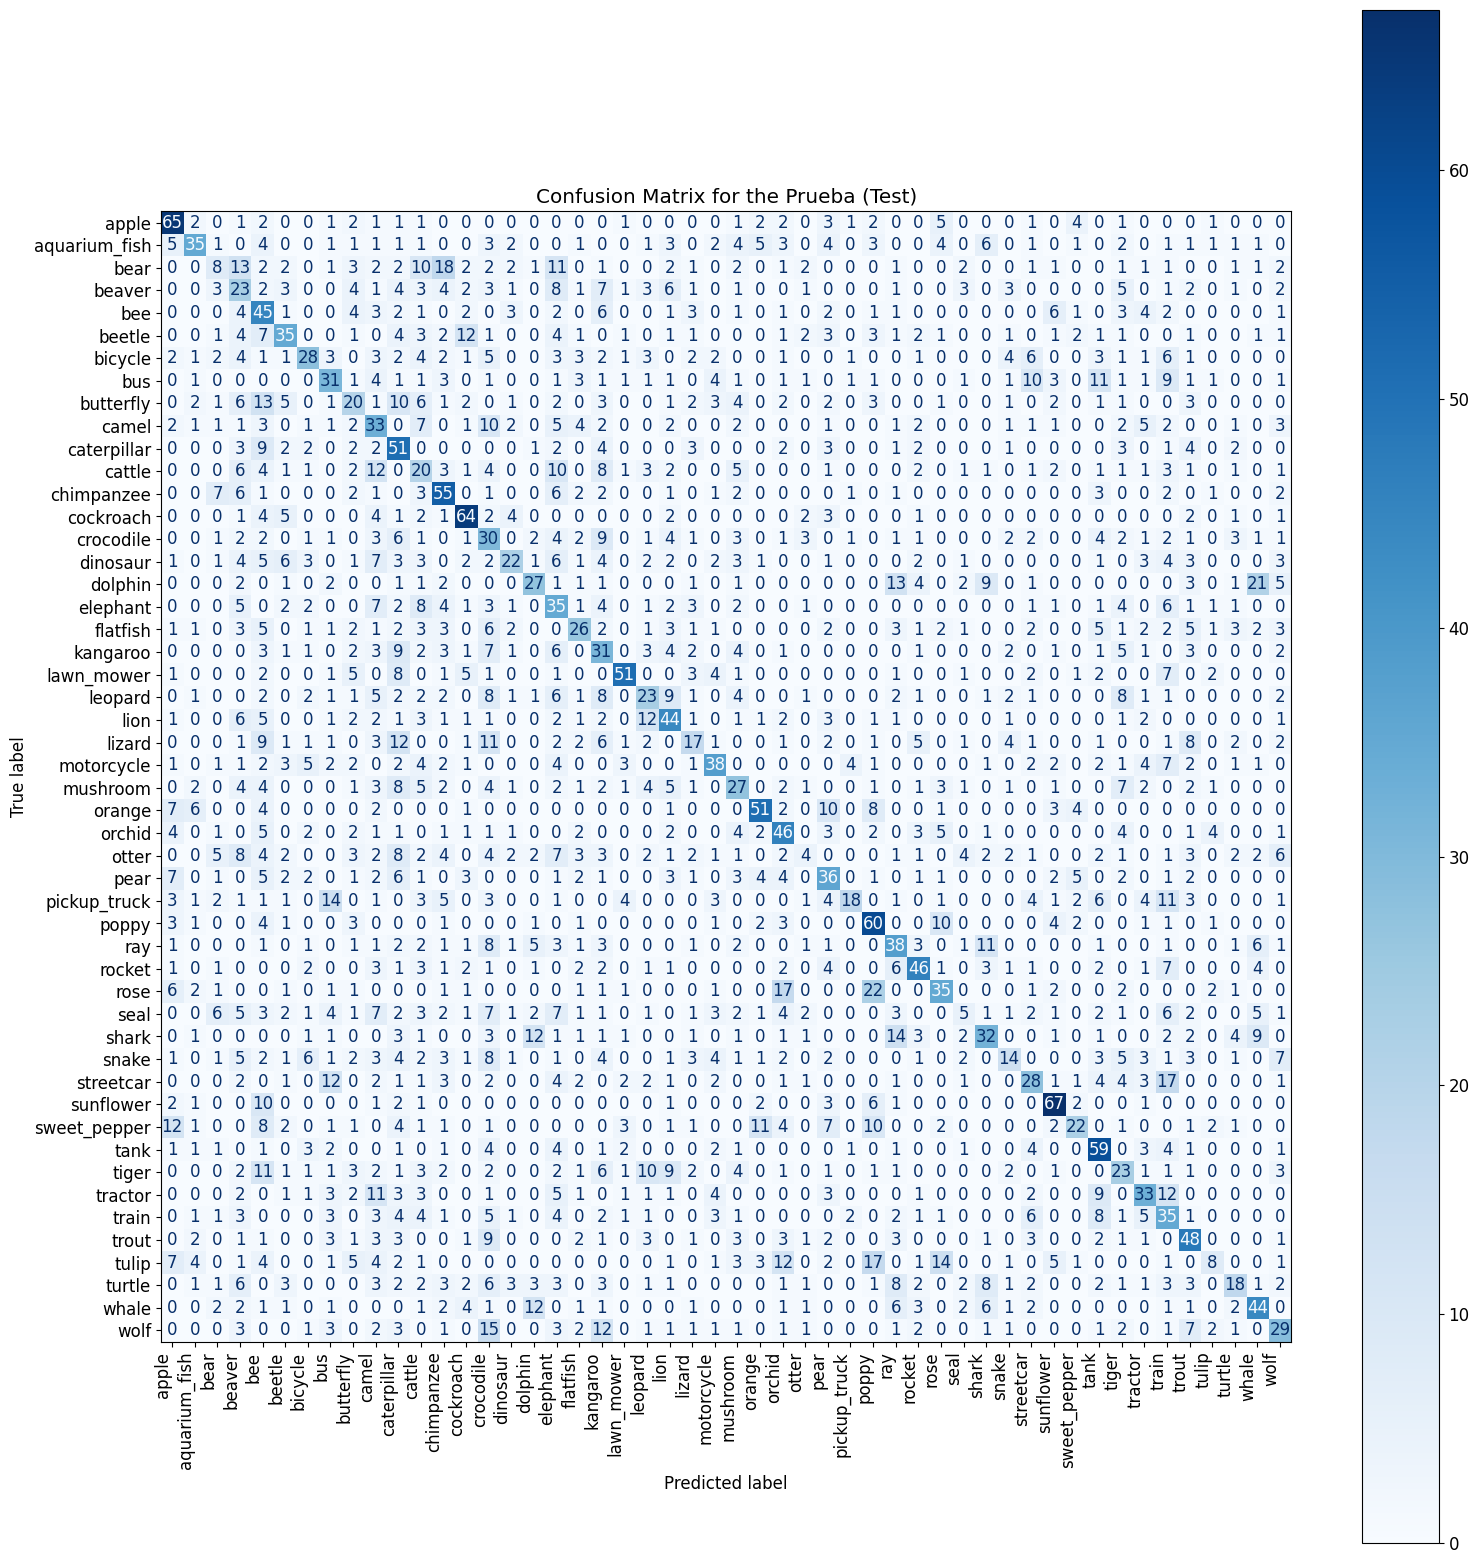

In [19]:
test_dl = learn.dls.test_dl(files_test, with_labels=True)

confusion_matrix_plot(learn, test_dl, "Prueba (Test)")

En las matrices de confusion, podemos ver como el eje y corresponde a las clases correctas, y el eje x a las clases predichas. Vemos claramente como el rendimiento del modelo no es demasiado bueno, aun que hay una ligera tendencia a que el modelo acierte la clase correcta en gran cantidad de casos, pero fallando en muchos otros.

Por otro lado, tenemos las peores 10 clases de cada matriz, siendo:

--- Evaluando: Entrenamiento (Train) ---
Peores 10 clases (índice y exactitud):

    Clase 28: 0.16
    Clase 46: 0.16
    Clase 42: 0.20
    Clase 35: 0.22
    Clase 3: 0.25
    Clase 23: 0.26
    Clase 17: 0.28
    Clase 16: 0.28
    Clase 37: 0.29
    Clase 9: 0.31

--- Evaluando: Validación (Validation) ---
Peores 10 clases (índice y exactitud):

    Clase 46: 0.04
    Clase 4: 0.08
    Clase 28: 0.08
    Clase 42: 0.08
    Clase 7: 0.10
    Clase 37: 0.11
    Clase 35: 0.12
    Clase 47: 0.12
    Clase 9: 0.13
    Clase 38: 0.14

--- Evaluando: Prueba (Test) ---
Peores 10 clases (índice y exactitud):

    Clase 28: 0.06
    Clase 42: 0.07
    Clase 46: 0.10
    Clase 35: 0.13
    Clase 3: 0.14
    Clase 23: 0.16
    Clase 11: 0.16
    Clase 15: 0.18
    Clase 37: 0.18
    Clase 17: 0.19


Vemos como notoriamente se cometen más errores en las predicciones de los conjuntos de validación y test, lo cual es lógico. Por otro lado, vemos ocmo las clases 42, 28, 46 son clases que el modelo tiende a predecir bastante mal en todos los conjuntos. Esto puede deberse a que la extracción de características de estos tipos de imagenes es especialmente dificil y el modelo necesitaría ciertos cambios para mejorarla, o incluso los propios datos podrían mejorarse, aunque no vamos a recurrir a eso, ya que lo primero que se debe de hacer es perfeccionar el modelo. El resto de peores clases predichas parecen no coincidir tanto, y de manera parecida todos tienen un rendimiento malo.

## <font color='blue'> Comparando GPU y CPU (0.5 puntos)

<font color='blue'>Ahora el alumnado debe entrenar el mismo modelo, pero con CPU (`Entorno de Ejecución - Cambiar tipo de entorno de ejecución - CPU`). ¿Qué ocurre? ¿Hay alguna diferencia en cuanto al entrenamiento? ¿Qué ocurre si empleamos un batch size de tamaño $1$ o $256$ en CPU o GPU?

<font color='blue'>**Nota1**: no hay forma programática de ir cambiando de entorno de ejecución dentro de un bucle. De modo que es necesario modificarlo manualmente en `Entorno de ejecución`.

<font color='blue'>**Nota2**: no se trata de realizar un estudio exhaustivo ni de repetir el ejercicio al completo con distintos entornos de ejecución (CPU, GPU A100, GPU L4, GPU T4, TPU v6e-1, TPU v5e-1), aunque, quien quiera, es libre de hacerlo. Se trata solamente de documentar algunos breves experimentos (por ejemplo, empleando menos épocas), e intentar explicar los resultados obtenidos a nivel de tiempos de entrenamiento, y cómo en dichos tiempos influye el tamaño del batch y el entorno hardware en que se entrena.

Internamente vamos a ejecutar el entrenamiento esta vez con la cpu.

Debido a que el cambio de entorno de ejecución reinicia toda la ejecución, voy a copiar la salida al ejecutar el entrenamiento con la cpu para poder mantenerla.

    learn.fit(5)

```
epoch  train_loss  valid_loss  accuracy  f1_score  time
0      3.913117    3.911984   0.021600  0.001676  00:42
1      3.908747    3.905416   0.023200  0.004210  00:40
2      3.711550    3.571376   0.064800  0.023036  00:44
3      3.401317    3.328097   0.121200  0.076727  00:48
4      3.225544    3.219850   0.149600  0.109718  00:44
5      3.136428    3.140600   0.166400  0.127297  00:43
```


Aqui vemos como el entrenamiento es notoriamente mas lento, lo cual es lógico ya que estamos usando nuestro procesador en vez de las gpus que nos proporciona google, las cuales son capaces de hacer calculos complejos de manera mucho más rápida y de ahí la diferencia de los tiempos.

Por otro lado, el rendimiento del modelo es prácticamente el mismo, tanto en accuracy como en f1 score, y esto es lo normal ya que la cpu es simplemente la que hace los calculos en este caso, pero esto no influye en el modelo ni en la predicción de los datos, ya que el proceso es el mismo, simplemente influye en la velocidad del proceso.

Vamos a probar ahora el batch size de 1 y de 256 con la gpu.

    dls = CIFAR_50.dataloaders(path/'train',bs=1)
    learn = Learner(
        dls,
        BaseNet,
        loss_func=nn.CrossEntropyLoss(),
        metrics=[accuracy, F1Score(average='macro')],
        opt_func=opt_func,
        cbs=earlystopping
    )


    learn.fit(3)

```
epoch  train_loss  valid_loss  accuracy  f1_score  time
0      3.913117    3.940573   0.019600  0.000769   00:42
1      3.931024	   3.939287	  0.016400	0.000645   06:54
2	   3.941921	   3.939082   0.016400	0.000645   06:48
```

In [20]:
dls = CIFAR_50.dataloaders(path/'train',bs=1)
learn = Learner(
    dls,
    BaseNet,
    loss_func=nn.CrossEntropyLoss(),
    metrics=[accuracy, F1Score(average='macro')],
    opt_func=opt_func,
    cbs=earlystopping
)


learn.fit(3)

Aqui, como podemos ver en ambos casos, el tiempo que se tarda por época es mucho mayor, y no proporciona un rendimiento mayor (por lo menos en las primeras epocas)  respecto al entrenamiento original con 128 de batch size.

Para entender esto tenemos que entender en que consiste el batch size.

El batch size es la cantidad de ejemplos que la red ejecuta antes de actualizar los pesos, si el batch es 1 (Stochastic gradient descent) lo que hacemos es actualizar constantemente los pesos tras cada ejecución, sin embrago cuando el batch es mayor a 1, se tiene en cuenta la media de la función de pérdida y se actualizan los pesos respecto a esta media.

Cuando el batch es 1, lo que ocurre es que la ejecución total pasa a ser mucho mas lenta, y no obtenemos ningún aspecto positivo a cambio ya que la actualizacion constante de pesos lo único que aporta es ruido al entrenamiento, no consigue un mejor resultado.

In [21]:
dls = CIFAR_50.dataloaders(path/'train',bs=256, num_workers = 0)
learn = Learner(
    dls,
    BaseNet,
    loss_func=nn.CrossEntropyLoss(),
    metrics=[accuracy, F1Score(average='macro')],
    opt_func=opt_func,
    cbs=earlystopping
)


learn.fit(8)

Aqui vemos como en el caso de un batch size de 256 (con gpu), el tiempo de ejecución es casi proporcionalmente mas rápido al de 128, lo cual era esperable habiendo explicado el anterior ejemplo, pero también encontramos algo interesante, y es que el modelo no ha aprendido apenas nada en esas 7 épocas, de hecho ha sido parado por el earlystopping por estancamiento.

Este suceso lo podemos explicar con el hecho de que el batch size es demasiado grande, y al tener tantos ejemplos sin hacer actualización de pesos, las actualizaciones son demasiado conservadoras y por lo tanto puede quedarse facilmente atascado en un mínimo local.

Si seguimos la función del SGD, podríamos deducir que para contrarrestar el problema con un learning rate mas grande, consiguiendo así aumentar el tamaño de cada "paso" en cada iteración.

## <font color='blue'> Eliminando FC layers (0.5 puntos)

<font color='blue'>Sabemos que el hecho de tener FC layers en una red convolucional fuerza a la entrada a tener un determinado tamaño. Del mismo modo, sabemos que las FC layers concentran buena parte de los pesos de una red. ¿De qué modo podríamos eliminarlas de nuestra arquitectura?  En este apartado debe implementar BaseNet pero sin utilizar FC layers. ¿Cuántos pesos tiene el nuevo modelo? Entrene el nuevo modelo siguiendo el mismo protocolo de entrenamiento, con los mismos hiperparámetros, del primer apartado. ¿Qué rendimiento se obtiene ahora? ¿Por qué?

Para poder eliminar las capas densas necesitamos modificar el modelo original. Esto ocurre debido a que en nuestro modelo anterior, las capas densas se encargaban de ir reduciendo la dimensionalidad del modelo hasta 50, que coincide con el numero de clases del problema, lo cual era muy conveniente.

Si quitamos estas capas, tenemos que encontrar una manera de que la salida del modelo sea de nuevo de tamaño 50. La dimensionalidad del output que hay en el modelo principal antes de las capas densas era de 15x10x10, por lo que tenemos que modificarla a que sea 50, para ello, una de las maneras sería aumentar el número de canales a 50, pasando a ser 50x10x10, y luego haciendo un AdaptiveAvgPool2d para que pase a 50x1x1.

El AdaptiveAvgPool2d es un tipo de pooling que se encarga de calcular la media (average) de toda la matriz de pixeles teniendo como salida la matriz pasada como parámetro, por lo que podemos pasar una matriz (1,1) y obtendríamos la media total de la matriz.

Por otro lado, si tenemos una matriz 10x10 y hacemos un AdaptiveAvgPool2d(2,2) la salida será una matriz 2x2, por lo que se habrá calculado la media de 4 regiones distintas, con un tamaño de probablemente 5x5.


Por otra parte, como hemos mencionado antes, nos interesa que la cantidad de canales sea 50, por lo que vamos a añadir una capa extra de convolucion, la cual va a pasar de 15 a 50 canales, con un tamaño de kernel de 3, para que nos quede una dimension de 50x10x10 para finalmente hacer el adaptativeAvgPool2d y obtener una dimension de 50x1x1.

In [22]:


BaseNet_noFC = nn.Sequential(
    nn.Conv2d(3, 10, kernel_size=7, padding=3),
    nn.Sigmoid(),
    nn.MaxPool2d(2, 2),
    nn.Conv2d(10, 15, kernel_size=7, padding=0),
    nn.Tanh(),
    nn.Conv2d(15, 50, kernel_size=1, padding=0),  # conv final en vez de FC
    nn.AdaptiveAvgPool2d((1,1)),       # Global Average Pooling
    nn.Flatten()                       # produce [batch, 50]
)
dls = CIFAR_50.dataloaders(path/'train',bs=128)
earlystopping = EarlyStoppingCallback(monitor='valid_loss', patience=5)
opt_func = partial(SGD, lr=0.01, mom=0.9)


learn = Learner(
    dls,
    BaseNet_noFC,
    loss_func=nn.CrossEntropyLoss(),
    metrics=[accuracy, F1Score(average='macro')],
    opt_func=opt_func,
    cbs=earlystopping
)

learn.summary()

Sequential (Input shape: 128 x 3 x 32 x 32)
Layer (type)         Output Shape         Param #    Trainable 
                     128 x 10 x 32 x 32  
Conv2d                                    1480       True      
Sigmoid                                                        
____________________________________________________________________________
                     128 x 10 x 16 x 16  
MaxPool2d                                                      
____________________________________________________________________________
                     128 x 15 x 10 x 10  
Conv2d                                    7365       True      
Tanh                                                           
____________________________________________________________________________
                     128 x 50 x 10 x 10  
Conv2d                                    800        True      
____________________________________________________________________________
                     128 x 50 x 

Para el cálculo de los pesos, obtendriamos que:

- Primera capa: Un kernel de 7x7x3(canales) de entrada + 1 de bias, todo esto multiplicado por 10 que son los filtros de salida, y obtenemos 1480.
- Segunda capa: Tenemos de entrada un kernel de 7x7x10 + 1 de bias, por lo que lo multiplicamos por 15 y obtenemos 7365.
- Ultima capa: La ultima convolucion toma de entrada un kernel de 3x3x15 canales + 1 bias, lo multiplicamos por 50 y obtenemos 6800.

Por lo tanto el numero de parámetros total es 1480+7365+6800 = 15645


Vamos a pasar con el entrenamiento, que como hemos visto en el learner creado, va a tener todos los parámetros correspondientes al inicio del ejercicio, batch size de 128, early stopping de paciencia 5, y 25 épocas.

In [23]:

learn.fit(25)

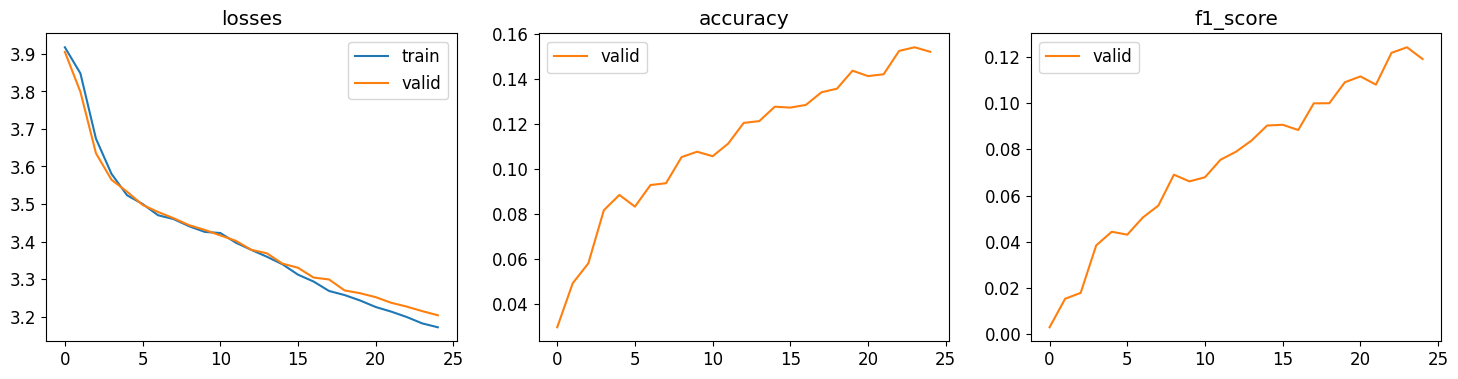

In [24]:
learn.recorder.plot_metrics()

Como vemos, y era de esperar, el rendimiento es bastante más malo, obteniendo un accuracy de máximo 0.20, y la mejora en las épocas finales del entrenamiento ha ido reduciendo, aunque no ha parecido estancarse. Podríamos aumentar el número de épocas para ver hasta que punto llega a estancarse, aunque la mejora de la precisión estaba reduciendo por lo que probablemente no obtendría mucho mas rendimiento.

Esto encaja con lo esperado debido a que este modelo tiene 15645 parametros aprendibles, lo cual hace que comparado a los 1,254,795 parámetros del modelo original sea mucho menos cantidad. Lo cual hace que inevitablemente el modelo sea mucho peor, aunque el rendimiento respecto a la reducción de parámetros es bastante bueno. Podríamos compensar la pérdida de parametros de las capas densas con más parámetros en las capas convolucionales y es bastante probable que obtengamos un mayor rendimiento a cambio de un menos costo computacional. Por otro lado, vemos como los tiempos por época han reducido bastante, lo cual también encaja con la reducción de cantidad de parámetros, que principalmente formaban parte de las capas densas.

# <font color='blue'> **Ejercicio 2:** **Mejoras sobre el modelo BaseNet (4 puntos)**
<font color='blue'>Ahora el objetivo es crear una versión mejorada del modelo _BaseNet_ (implementado en el primer apartado del ejercicio anterior). Para ello, se puede experimentar con distintas funciones de activación, funciones de pérdida, una mayor o menor profundidad de la red, un mayor o menor número de filtros por bloque convolucional, y/o diferentes técnicas de regularización u optimización, entre otras. De hecho, los alumnos deben sentirse libres para experimentar e incorporar todas las modificaciones que consideren pertinentes, incluyendo elementos no vistos ni en teoría ni en prácticas (por ejemplo, componentes que hayan podido descubrir a través de la revisión de artículos científicos) u otros más sencillos y directos (como entrenar por más épocas). **Se valorará la originalidad y complejidad de la propuesta realizada.**

<font color='blue'>Es necesario destacar que **es imprescindible justificar de la mejor forma posible las decisiones tomadas** (ya sea mediante evidencia empírica o mediante literatura científica), **así como el rendimiento obtenido** (esto es, intentar explicar qué es lo que hace que mejoren los resultados; desde este punto de vista, es importante moverse de la mera constatación al intento de explicación). También es importante remarcar que **las mejoras introducidas, dentro de lo posible, deben realizarse de forma incremental**, es decir, no basta con crear directamente (de forma "mágica") un único modelo y evaluarlo:  **es necesario justificar y describir qué pasos y resultados intermedios nos han llevado a diseñar ese modelo concreto**. Se debe describir cada una de las mejoras incorporadas, así como analizar los resultados obtenidos (del mismo modo que se hizo en el Ejercicio 1), y se debe emplear  un $10\%$ de los ejemplos de entrenamiento para validación. También es necesario, al igual que en el Ejercicio 1, desglosar el número de parámetros del modelo final, y se debe hacer un `summary()` del modelo para verificar que la arquitectura se ha construido correctamente y que el número de parámetros se corresponde con lo esperado.  

<font color='blue'>Como referencia para los estudiantes, se espera que la _accuracy_ en validación alcance, como mínimo, el $65\%$.


## Pruebas experimentales

Lo primero que se me ocurre para que este modelo tenga un mejor rendimiento, es aunmentar el número de canales que obtienen las dos capas convolucionales, ya que de esta manera aumentamos el número de parámetros y por lo tanto la red va a aprender más. Por otro lado vamos a introducir también otro maxpool, para que no haya demasiadas neuronas en las capas densas y no hay mucho overfitting.

Por ahora no vamos a cambiar la funcion de pérdida ni la función de optimización, ya que esto lo probaremos más adelante.


No improvement since epoch 31: early stopping


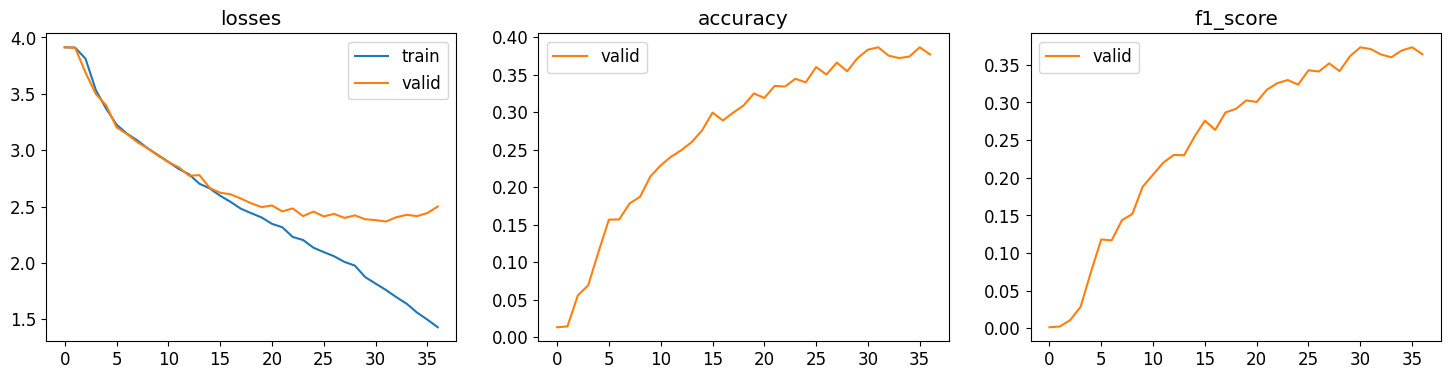

In [ ]:

BaseNet_mejorado = sequential(
    nn.Conv2d(in_channels=3, out_channels=15, kernel_size=(7,7), padding=3),
    nn.Sigmoid(),
    nn.MaxPool2d(kernel_size=2, stride=2),
    nn.Conv2d(in_channels=15, out_channels=32, kernel_size=7, padding=0),
    nn.Tanh(),
    nn.MaxPool2d(kernel_size=2, stride=2),
    nn.Flatten(),
    nn.Linear(800, 400),
    nn.ReLU(),
    nn.Linear(400, 150),
    nn.ReLU(),
    nn.Linear(150, 50)
)

dls = CIFAR_50.dataloaders(path/'train',bs=128)
earlystopping = EarlyStoppingCallback(monitor='valid_loss', patience=5)

opt_func = partial(SGD, lr=0.01, mom=0.9)
learn = Learner(
    dls,
    BaseNet_mejorado,
    loss_func=nn.CrossEntropyLoss(),
    metrics=[accuracy, F1Score(average='macro')],
    opt_func=opt_func,
    cbs=earlystopping
)
BaseNet_mejorado
learn.summary()
learn.fit(50)
learn.recorder.plot_metrics()

Como bien vemos, ha ocurrido una ligera mejora, hemos aumentado las epocas para que el modelo tenga tiempo de aprender, pero sigue habiendo overfitting a partir de la época 15, y además el modelo sigue sin ser suficiente, por lo que tenemos que implementar más mejoras.



Por un lado, podemos introducir capas de dropout. Estas capas se encargan de inhabilitar neuronas de manera aleatoria, en funcion de $p$ como probabilidad, en nuestro caso $p$ corresponde con la probabilidad de que una neurona se inhabilite. Pero, ¿por qué es esto beneficioso?, la respuesta esta en que al inhabilitar cierta cantidad de neuronas, el modelo comienza a aprender con menos recursos, por lo que a la hora de inferencia (que estas neuronas vuelven a estar activas) es capaz de generalizar mejor y por lo tanto que la diferencia entre el error en train y en validación sea menor.

No improvement since epoch 34: early stopping


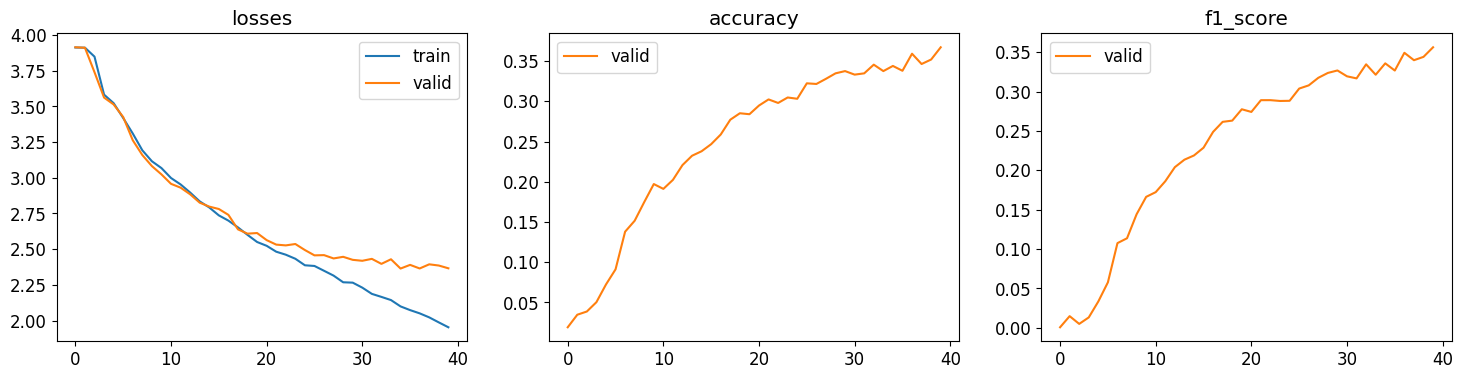

In [ ]:
BaseNet_mejorado = sequential(
    nn.Conv2d(in_channels=3, out_channels=15, kernel_size=(7,7), padding=3),
    nn.Sigmoid(),
    nn.Dropout(0.1),
    nn.MaxPool2d(kernel_size=2, stride=2),
    nn.Conv2d(in_channels=15, out_channels=32, kernel_size=7, padding=0),
    nn.Tanh(),
    nn.MaxPool2d(kernel_size=2, stride=2),
    nn.Flatten(),
    nn.Dropout(0.5),
    nn.Linear(800, 400),
    nn.ReLU(),
    nn.Linear(400, 150),
    nn.ReLU(),
    nn.Linear(150, 50)
)

dls = CIFAR_50.dataloaders(path/'train',bs=128)

opt_func = partial(SGD, lr=0.01, mom=0.9)
learn = Learner(
    dls,
    BaseNet_mejorado,
    loss_func=nn.CrossEntropyLoss(),
    metrics=[accuracy, F1Score(average='macro')],
    opt_func=opt_func,
    cbs=earlystopping
)
BaseNet_mejorado
learn.summary()
learn.fit(50)
learn.recorder.plot_metrics()

Como vemos ahora, hemos conseguido quitar parte  del overfitting, aunque en el tramo final sigue habiendo, por lo que quiza podríamos aumentarlo aún más. Por otra parte, no hemos tenido en cuenta que cuando regularizamos con dropout, debemos de aumentar el learning rate. Esto es así ya que cuando conseguimos desactivar neuronas para regularizar el modelo, este necesita un tasa de aprendizaje más alto para no estancarse. Aunque en este caso no parece ser ese el motivo del estancamiento, en este caso hace falta más regularización.

Vamos a optar ahora por reducir el numero de capas densas a 1, debido a que como bien anteriormente vimos, obtuvimos un peor redimiento pero reduciendo la cantidad de parámetros de manera muy grande, lo cual se podría compensar con más capas convolucionales, consiguiendo así que las capas densas no creen tanto overfitting, ya que estas son también las principales causantes debido a su gran numero de conexiones.

Como vamos a hacer este cambio, para compensar la regularización, vamos a poner un dropout menos brusco, ya que probablemente no será tan necesario en este caso.

Por otro lado vamos a probar a cambiar el tamaño del kernel, hago este cambio debido a que las imagenes de entrada son de tamaño 32x32, y solemos hacer maxpool cambiando el tamaño a 16x16, siendo este tamaño demasiado pequeño para un kernel tan grande. Le veo más sentido un kernel de 7x7 a imagenes de mayor resolución, pero en este problema para obtener unas características más precisas veo mas acertado kernels de 5 o de 3.

SuggestedLRs(valley=0.00363078061491251)


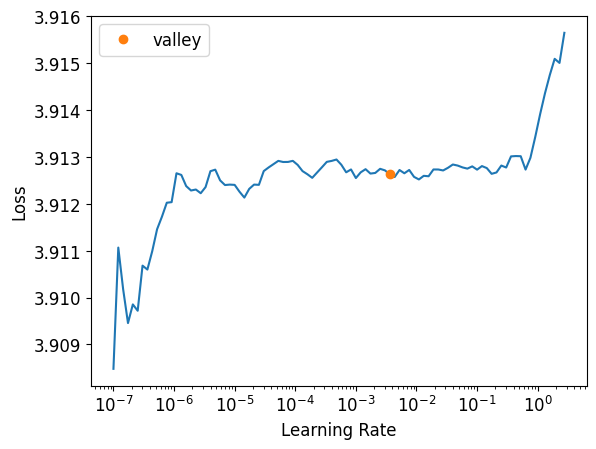

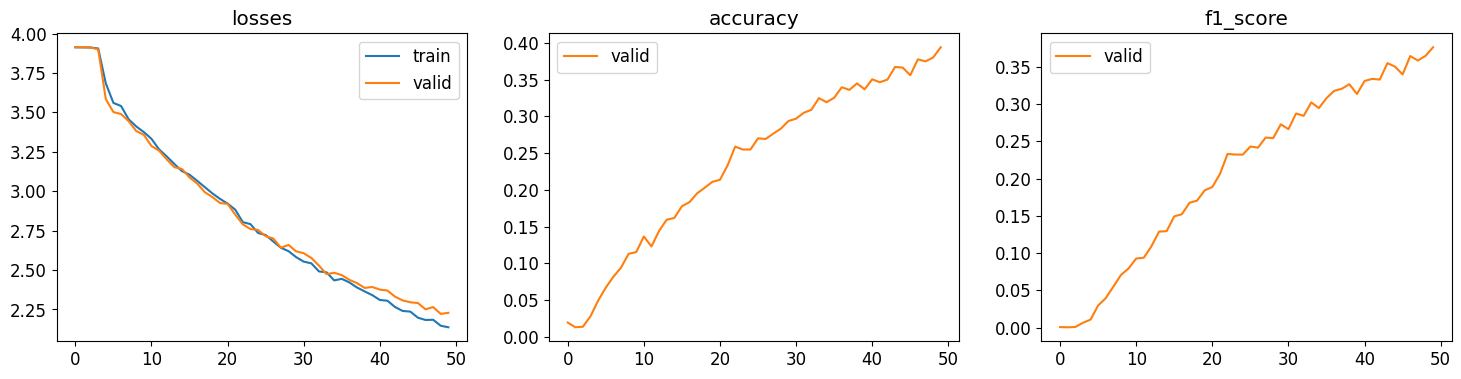

In [ ]:
BaseNet_mejorado = sequential(
    nn.Conv2d(in_channels=3, out_channels=15, kernel_size=3, padding=3),
    nn.Sigmoid(),
    nn.MaxPool2d(kernel_size=2, stride=2),
    nn.Conv2d(in_channels=15, out_channels=32, kernel_size=3, padding=0),
    nn.Tanh(),
    nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, padding=0),
    nn.ReLU(),
    nn.Dropout(0.1),
    nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, padding=0),
    nn.ReLU(),
    nn.Conv2d(in_channels=128, out_channels=256, kernel_size=3, padding=0),
    nn.ReLU(),
    nn.AdaptiveAvgPool2d((1,1)),
    nn.Flatten(),
    nn.Dropout(0.2),
    nn.Linear(256, 50),
)

dls = CIFAR_50.dataloaders(path/'train',bs=128)

opt_func = partial(SGD, lr=0.01, mom=0.9)
learn = Learner(
    dls,
    BaseNet_mejorado,
    loss_func=nn.CrossEntropyLoss(),
    metrics=[accuracy, F1Score(average='macro')],
    opt_func=opt_func,
    cbs=earlystopping
)

learn.fit(50)
learn.recorder.plot_metrics()

Ahora vemos como el entrenamiento es mucho mas constante y no ha parado de mejorar, de hecho, como no converge, necesita más epocas para que podamos ver hasta cuanto es capaz de llegar. Por otro lado, el aprendizaje que tiene es bastante lento, que era algo a esperar como mencionabamos anteriormente al regularizar el modelo, por lo que vamos a aumentarle el learning rate significativamente y las epocas para ver como se comporta.

SuggestedLRs(valley=0.015848932787775993)


No improvement since epoch 44: early stopping


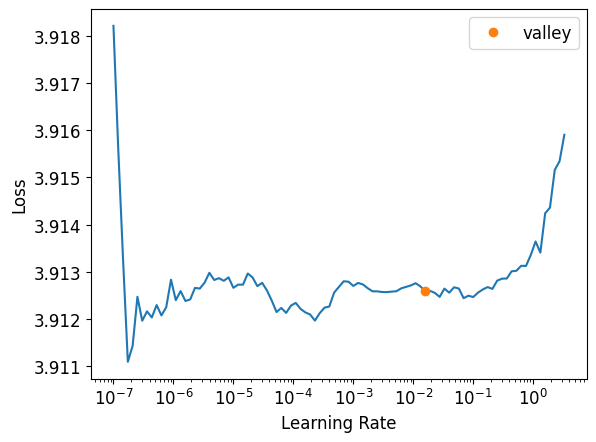

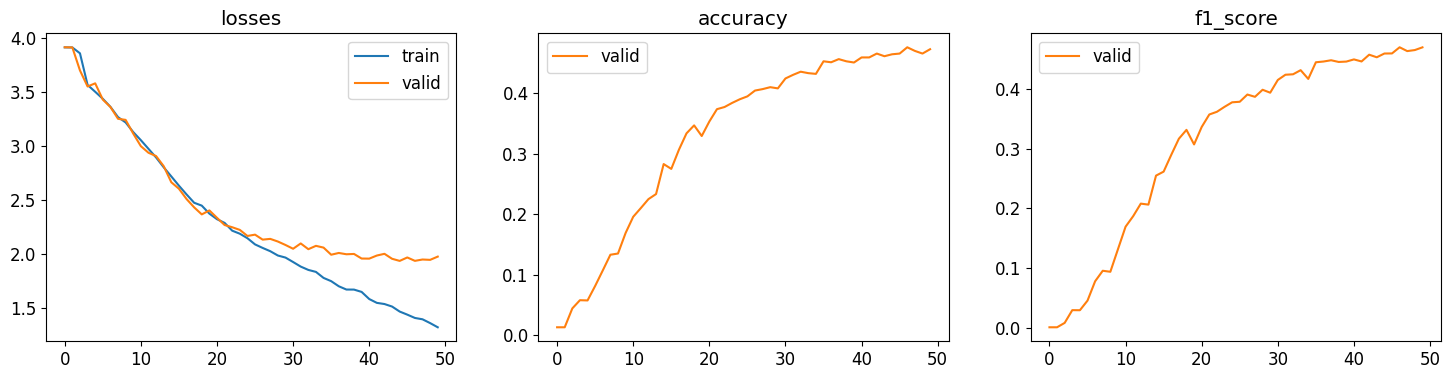

In [ ]:
BaseNet_mejorado = sequential(
    nn.Conv2d(in_channels=3, out_channels=15, kernel_size=3, padding=3),
    nn.Sigmoid(),
    nn.MaxPool2d(kernel_size=2, stride=2),
    nn.Conv2d(in_channels=15, out_channels=32, kernel_size=3, padding=0),
    nn.Tanh(),
    nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, padding=0),
    nn.ReLU(),
    nn.Dropout(0.1),
    nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, padding=0),
    nn.ReLU(),
    nn.Conv2d(in_channels=128, out_channels=256, kernel_size=3, padding=0),
    nn.ReLU(),
    nn.AdaptiveAvgPool2d((1,1)),
    nn.Flatten(),
    nn.Dropout(0.2),
    nn.Linear(256, 50),
)

dls = CIFAR_50.dataloaders(path/'train',bs=128)

opt_func = partial(SGD, lr=0.03, mom=0.9)
learn = Learner(
    dls,
    BaseNet_mejorado,
    loss_func=nn.CrossEntropyLoss(),
    metrics=[accuracy, F1Score(average='macro')],
    opt_func=opt_func,
    cbs=earlystopping
)

learn.fit(70)
learn.recorder.plot_metrics()

Ahora, efectivamente vemos hasta donde ha llegado, que ha experimentado una mejora significativa, llegando a un 0.47 de accuracy, aunque vemos como a partir de la epoca 25 aproximadamente empieza a haber overfitting, por lo que necesitamos más regularización.

Para esto, he estado viendo un paper llamado Dropout: A Simple Way to Prevent Neural Networks from Overfitting (https://www.jmlr.org/papers/volume15/srivastava14a/srivastava14a.pdf), en el cual explican el porqué del uso del dropout, y además, prueban que es beneficioso aumentar el numero de capas de dropout con distintas probabilidades , ajustándolas segun el tipo de capa en la que se encuentre. Para las primeras capas una $p$ pequeña, e ir aumentando la $p$ hasta las capas finales donde alcanzaría su máximo valor, siendo las capas finales donde mayor sobreajuste suele haber debido a la gran cantidad de parámetros aprendidos acumulados.

Tambíen se menciona el aumento del learning rate, que podemos tener como referencia cuando se aplica dropout:

"Dropout introduces a significant amount of noise in the gradients compared to standard stochastic gradient descent. Therefore, a lot of gradients tend to cancel each other. In order to make up for this, a dropout net should typically use 10-100 times the learning rate that was optimal for a standard neural net."

Viendo como podemos aumentar hasta 100 veces el learning rate al añadir esta cantidad de dropout, aunque será cuestión de probar. Por ahora vamos a aumentar el lr a 0.05 y ver como funciona.

Por otro lado, utilizan otra medida de regularización, que es el max-norm, la cual se encarga de normalizar los pesos, evitando así que puedan crecer descontroladamente, aumentando por lo tanto la regularización y siendo mas insensibles al learning rate alto. Aunque esto todavia no lo vamos a implementar.

In [ ]:
import torch.nn as nn

class BaseNetDropout(nn.Module):
    def __init__(self, dropout_rate=0.5):
        super().__init__()

        self.features = nn.Sequential(
            nn.Conv2d(in_channels=3, out_channels=15, kernel_size=3, padding=3),
            nn.Sigmoid(),
            nn.Dropout(dropout_rate * 0.1),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(in_channels=15, out_channels=32, kernel_size=3, padding=0),
            nn.Tanh(),
            nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, padding=0),
            nn.ReLU(),
            nn.Dropout(dropout_rate * 0.2),
            nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, padding=0),
            nn.ReLU(),
            nn.Conv2d(in_channels=128, out_channels=256, kernel_size=3, padding=0),
            nn.ReLU(),
            nn.Dropout(dropout_rate),
        )

        self.pool = nn.AdaptiveAvgPool2d((1, 1))
        self.flatten = nn.Flatten()

        self.classifier = nn.Sequential(
            nn.Dropout(dropout_rate),
            nn.Linear(256, 50)
        )

    def forward(self, x):
        x = self.features(x)
        x = self.pool(x)
        x = self.flatten(x)
        x = self.classifier(x)
        return x

SuggestedLRs(valley=7.585775892948732e-05)


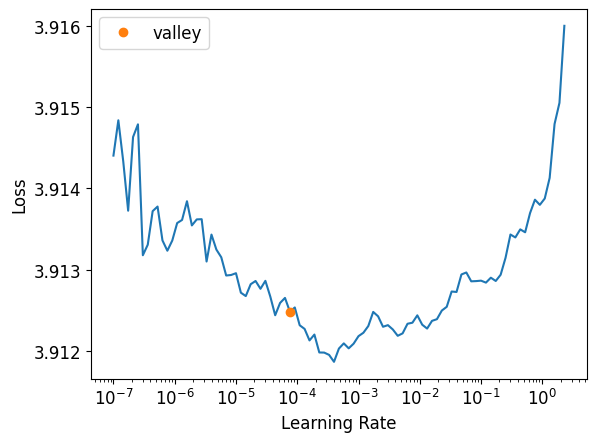

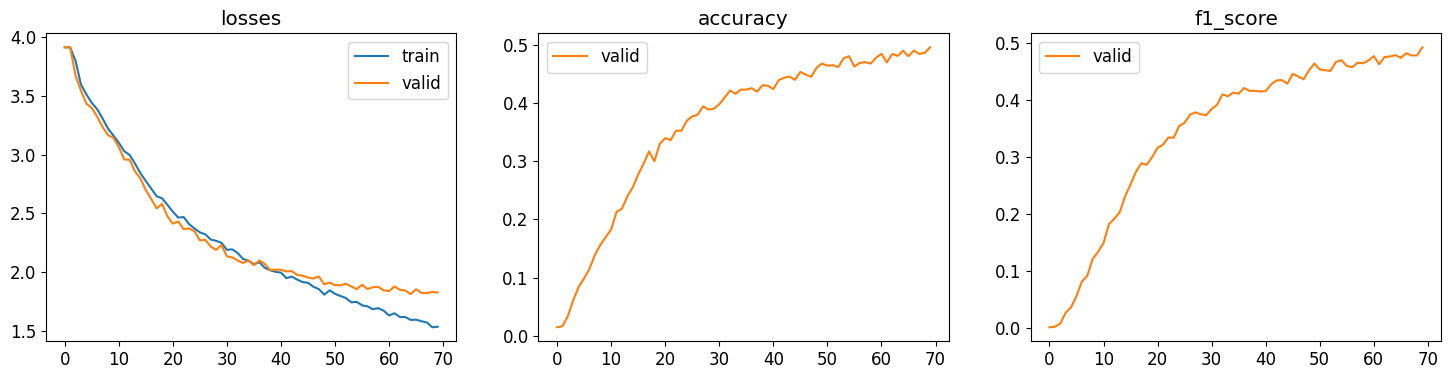

In [ ]:
model = BaseNetDropout(dropout_rate=0.5)

dls = CIFAR_50.dataloaders(path/'train',bs=128)

earlystopping = EarlyStoppingCallback(monitor='valid_loss', patience=10)
opt_func = partial(SGD, lr=0.03, mom=0.9)
learn = Learner(
    dls,
    model,
    loss_func=nn.CrossEntropyLoss(),
    metrics=[accuracy, F1Score(average='macro')],
    opt_func=opt_func,
    cbs=earlystopping
)

learn.summary()

learn.fit(70)
learn.recorder.plot_metrics()

Por aquí podemos ver que el overfitting ha reducido bastante, y el rendimiento del modelo ha aumentado ligeramente (hasta 0.49), lo cual podemos decir que ha sido positivo este cambio.

Vamos a seguir con la parte metódica y vamos a incluir en los datos ciertas transformaciones y manipulaciones para mejorar la estabilidad, y hacer mas robusto al modelo.

Por un lado tenemos la normalizacion de los datos, la cual va a consistir en aplicar Normalize.from_stats(*imagenet_stats). Esta función se encarga de aplicar una normalización siguiendo las estadisticas de ImageNet.

imagenet_stats contiene dos tuplas:

$$
mean = (0.485, 0.456, 0.406)
$$
$$
std = (0.229, 0.224, 0.225)
$$



Normalize.from_stats(mean, std) crea una transformación que, cuando se aplica a una imagen, hace esto para cada canal (R, G, B):
	​
$$
x_{norm} = \frac{x-mean}{std}
$$

Es decir:

R se normaliza restando 0.485 y dividiendo por 0.229

G se normaliza restando 0.456 y dividiendo por 0.224

B se normaliza restando 0.406 y dividiendo por 0.225

Esto ayuda a que las imágenes empiecen con la misma distribución que las que se han usado para entrenar redes neuronales grandes como ResNet, etc.
Además, mejora la estabilidad y la velocidad del entrenamiento, debido a que las imágenes se encuentran en un rango que el modelo espera.



### Data Augmentation

Por otro lado, existe otro tipo de transformaciones para complicar los datos y que la red pueda aprender mejor, que es el data augmentation.

El data augmentation consiste en aplicar tranformaciones geometricas a las imágenes, ya sean de rotación, flip, etc, para poder tener más ejemplos de los que la red neuronal pueda aprender. Esto aumenta la diversidad de las imágenes de entrenamiento, evitando que el modelo memorice los datos y ayudando a que aprenda características más robustas.

Cabe destacar que estas tranformaciones no se añaden al conjunto de datos, se hacen dinamicamente durante el entrenamiento.

In [ ]:
CIFAR_50 = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.1, seed=42),
    get_y=parent_label,
    item_tfms=Resize(32),
    batch_tfms=[
        *aug_transforms(
            do_flip=True,
            flip_vert=False,
            max_rotate=15,
            max_zoom=1.1,
            max_lighting=0.2,
            max_warp=0.2,
            p_affine=0.75,
            p_lighting=0.75
        ),
        Normalize.from_stats(*imagenet_stats)
    ]
)

dls = CIFAR_50.dataloaders(path/'train', bs=128)

Aqui vemos que aplicamos distintas transformaciones, como el flip horizontal, también aplicamos rotaciones con máximo 15 grados, zoom con máximo 1.1 y máxima iluminación a 0.2, consiguiendo que se normalice la iluminación media de las imagenes. Además tenemos wraping, el cual se encarga de cambiar la perspectiva de la imagen, y por ultimo p_affine y p_lighting que indican la probabilidad de aplicar las transformaciones a las imágenes.

También, a partir de ahora, vamos a utilizar lr_find() y fit_one_cycle().


La función lr_find() sirve para encontrar una tasa de aprendizaje adecuada antes de empezar el entrenamiento completo. Lo que hace es realizar un pequeño entrenamiento de prueba, aumentando progresivamente la tasa de aprendizaje en cada mini-batch. Mientras lo hace, registra cómo evoluciona la pérdida. Al finalizar, nos muestra una gráfica donde podemos ver la pérdida en función de la tasa de aprendizaje. La idea es elegir una tasa de aprendizaje que esté en la zona de descenso más pronunciado, típicamente un orden de magnitud antes de que la pérdida empiece a dispararse. Esto nos evita tener que adivinar un valor y nos da un punto de partida mucho más robusto.

En la gráfica generada por lr_find(), el valley (valle) se refiere al punto más bajo estable de la curva de pérdida antes de que ésta comience a aumentar de forma abrupta y sostenida.

¿Por qué se suele escoger este punto?
Es la tasa de aprendizaje óptima sugerida por el algoritmo. Corresponde a la tasa más alta que todavía permite que la pérdida disminuya de manera consistente. En este punto, el modelo está aprendiendo lo más rápido posible sin que la optimización se vuelva inestable.

Criterio de selección (regla de Leslie Smith):
Se toma la tasa de aprendizaje que está un orden de magnitud menor (10 veces más pequeña) que la tasa ubicada en el punto más bajo del valle. Esto proporciona un margen de seguridad. En la gráfica, FastAI suele marcar este punto con un distintivo (como una x roja).

Por otro lado, fit_one_cycle() es una política de entrenamiento que organiza automáticamente el ritmo de aprendizaje. En lugar de usar una tasa fija o un decaimiento simple, esta técnica sigue un ciclo: comienza con una tasa baja, la aumenta hasta alcanzar el valor máximo que hayamos indicado (por ejemplo, el sugerido por lr_find()), y luego la disminuye gradualmente hasta un valor muy bajo. Este ciclo, combinado con un ciclo análogo para el momentum (que va en sentido contrario), ayuda a que el modelo converja más rápido y, a menudo, a un mejor mínimo de la función de pérdida, reduciendo el riesgo de sobreajuste. Básicamente, fit_one_cycle() gestiona todo el programa de tasas de aprendizaje por nosotros, haciendo el entrenamiento más efectivo con muy poca configuración manual.


SuggestedLRs(valley=6.918309736647643e-06)


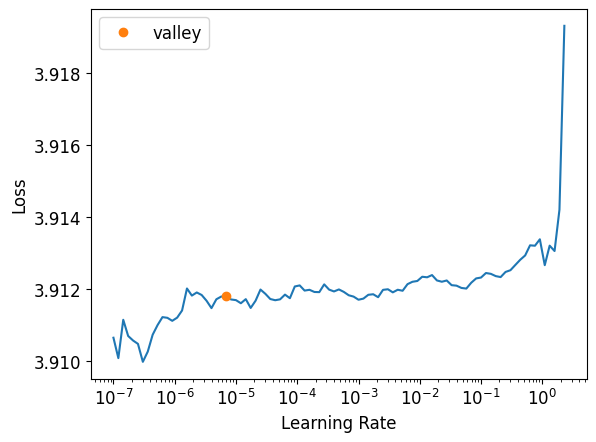

In [ ]:
model = BaseNetDropout(dropout_rate=0.5)

dls = CIFAR_50.dataloaders(path/'train',bs=128)

earlystopping = EarlyStoppingCallback(monitor='valid_loss', patience=10)
opt_func = partial(SGD, mom=0.9)
learn = Learner(
    dls,
    model,
    loss_func=nn.CrossEntropyLoss(),
    metrics=[accuracy, F1Score(average='macro')],
    opt_func=opt_func,
    cbs=earlystopping
)

learn.summary()
lrf = learn.lr_find()
print(lrf)

Aqui vemos como el valley esta entorno a 10^-6, pero si vamos a utilizar fit_one_cycle(), ¿es lo lógico utilizar ese valor?.

Cuando usamos fit_one_cycle(), debido a su aumento gradual de lr y disminucion, el entrenamiento pasa la mayor parte del tiempo con un lr menor al asignado, por lo tanto podemos permitirnos poner un valor más alto, concretamente, lo ideal es buscar el punto de mayor aprendizaje sin que el modelo diverga, el cual según la gráfica está entorno a 10^-2, por lo que vamos a usar 0.03(tras una prueba con 0.01 el aprendizaje era demasiado lento).

In [ ]:
learn.fit_one_cycle(90,lr_max=0.05)

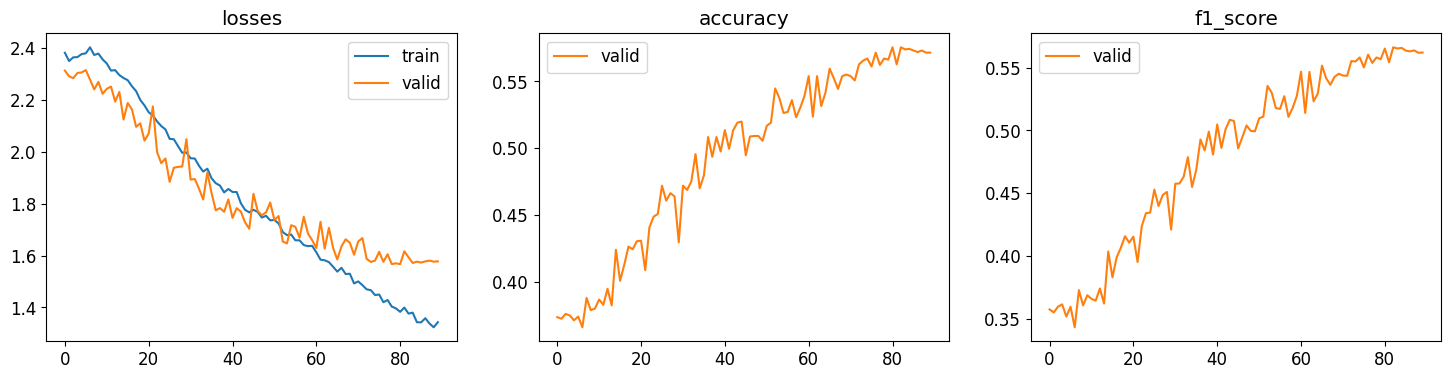

In [ ]:
learn.recorder.plot_metrics()

Como era esperado, los resultados han sido notablemente mejores, ya que estas aplicaciones en los datos son casi obligatorias en la mayoria de los casos, ya que casi con total seguridad va a ser positivo para el modelo.

Vemos como el data augmentation ha hecho que ocurra un poco de underfitting al principio de las épocas, lo cual es normal ya que esto regulariza el modelo bastante.

### Batch Normalization

Por otro lado podemos incluir un tipo de capa nueva dada en clase, que también actúa como regularización, el batch normalization.

El batch normalizatión consiste en aplicar una normalización a las salidas de las capas de convolución, teniendo influencia la media del batch en cuestión, siguiendo la siguiente fórmula:
Para cada feature/channel k:

Paso 1: Normalización

$$
\hat{x}^{(k)} = \frac{x^{(k)} - \mu_\mathcal{B}^{(k)}}{\sqrt{(\sigma_\mathcal{B}^{(k)})^2 + \epsilon}}
$$

Paso 2: Escalado y desplazamiento

$$
y^{(k)} = \gamma^{(k)} \hat{x}^{(k)} + \beta^{(k)}
$$

Donde:
- $x^{(k)}$: Activación del canal $k$
- $\mu_\mathcal{B}^{(k)}$: Media del batch para el canal $k$
- $\sigma_\mathcal{B}^{(k)}$: Desviación estándar del batch para el canal $k$
- $\epsilon$: Pequeña constante para estabilidad numérica ($\approx 10^{-5}$)
- $\gamma^{(k)}$: Parámetro de escalado aprendible (por canal)
- $\beta^{(k)}$: Parámetro de desplazamiento aprendible (por canal)
- $y^{(k)}$: Salida normalizada


 **¿Por qué se usa Batch Normalization?**

1. Reduce el Internal Covariate Shift


    Cada capa de la red recibe entradas cuya distribución cambia constantemente durante el entrenamiento,
    lo que dificulta la convergencia. BN estabiliza estas distribuciones.

2. Permite usar learning rates más altos


    Al normalizar las activaciones, los gradientes se mantienen en un rango estable, permitiendo learning rates
    más grandes sin riesgo de divergencia.

3. Mejora el flujo de gradientes


    Evita problemas de vanishing/exploding gradients al mantener las activaciones en un rango controlado.

Debido a esto, vamos a incluir batchnormalization a partir de ahora en todas las salidas de las funciones de activación.

Por otro lado, para la elección del learning rate, tenemos la función lr_find() del learner. Esta se encarga de construir un gráfico usando una época del entrenamiento, evaluando la perdida en función de distintos learnings rate. Esta función tiende a escoger el learning rate más grande posible sin que el modelo diverga. Vamos a utilizar el learning rate que nos da esta función como referencia. Cabe destacar que el resultado que nos da esta función es variable, debido a que al evaluar una epoca esta puede ser distinta en función de cada ejecución.




Vamos a hablar también de las funciones de activación usadas. He estado utilizando ReLU para las convoluciones añadidas debido a que es la función de activación más popular hoy en día para estas activaciones. Pero, ¿qué pasa con las primeras activaciones, la de tanh y la de sigmoid?

Las funciones Sigmoid y Tanh saturan en valores extremos. Sus derivadas se acercan a cero cuando la entrada es muy positiva o negativa. Esto puede conllevar al conocido problema con gradiente desvanecido, donde los gradientes acaban llegando a desaparecer tras el trascurso del entrenamiento y por lo tanto la red puede llegar a dejar de aprender.

ReLU soluciona esto debido a que su función es la siguiente:

$$
f(x) = max(0,x)
$$

Cuya derivada es 1 para x > 0, lo que evita el problema de los gradientes, y además, su cálculo es extremadamente rápido, ya que no tenemos calculos exponenciales.

In [ ]:
import torch.nn as nn

class BaseNetBatchNorm(nn.Module):
    def __init__(self, dropout_rate=0.5):
        super().__init__()

        self.features = nn.Sequential(
            # Capa 1
            nn.Conv2d(in_channels=3, out_channels=15, kernel_size=3, padding=3),
            nn.BatchNorm2d(15),
            nn.ReLU(),
            nn.Dropout(dropout_rate * 0.1),
            nn.MaxPool2d(kernel_size=2, stride=2),

            # Capa 2
            nn.Conv2d(in_channels=15, out_channels=32, kernel_size=3, padding=0),
            nn.BatchNorm2d(32),
            nn.ReLU(),

            # Capa 3
            nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, padding=0),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.Dropout(dropout_rate * 0.2),

            # Capa 4
            nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, padding=0),
            nn.BatchNorm2d(128),
            nn.ReLU(),

            # Capa 5
            nn.Conv2d(in_channels=128, out_channels=256, kernel_size=3, padding=0),
            nn.BatchNorm2d(256),
            nn.ReLU(),
            nn.Dropout(dropout_rate),
        )

        self.pool = nn.AdaptiveAvgPool2d((1, 1))
        self.flatten = nn.Flatten()

        self.classifier = nn.Sequential(
            nn.Dropout(dropout_rate),
            nn.Linear(256, 50)
        )

    def forward(self, x):
        x = self.features(x)
        x = self.pool(x)
        x = self.flatten(x)
        x = self.classifier(x)
        return x

SuggestedLRs(valley=0.0063095735386013985)


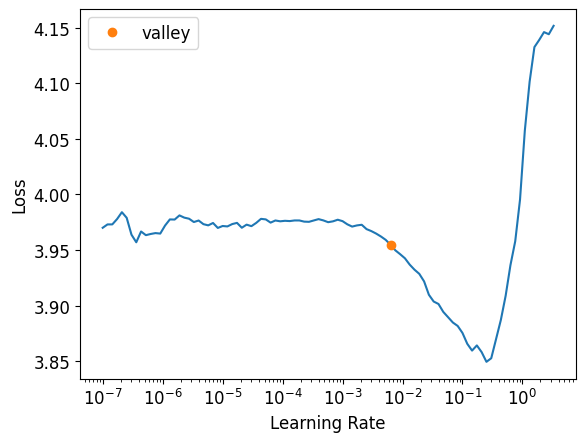

In [ ]:
model = BaseNetBatchNorm(dropout_rate=0.5)

dls = CIFAR_50.dataloaders(path/'train',bs=64)

opt_func = partial(SGD, lr=0.03, mom=0.9)
learn = Learner(
    dls,
    model,
    loss_func=nn.CrossEntropyLoss(),
    metrics=[accuracy, F1Score(average='macro')],
    opt_func=opt_func,
    cbs=earlystopping
)
lr_f = learn.lr_find()
print(lr_f)


Como vemos, ahora nos sugiere un lr de aproximadamente 0.003,  nosotros, vamos a escoger 0.03 para usar fit_one_cycle().


In [ ]:
learn.fit_one_cycle(70, lr_max=0.03)

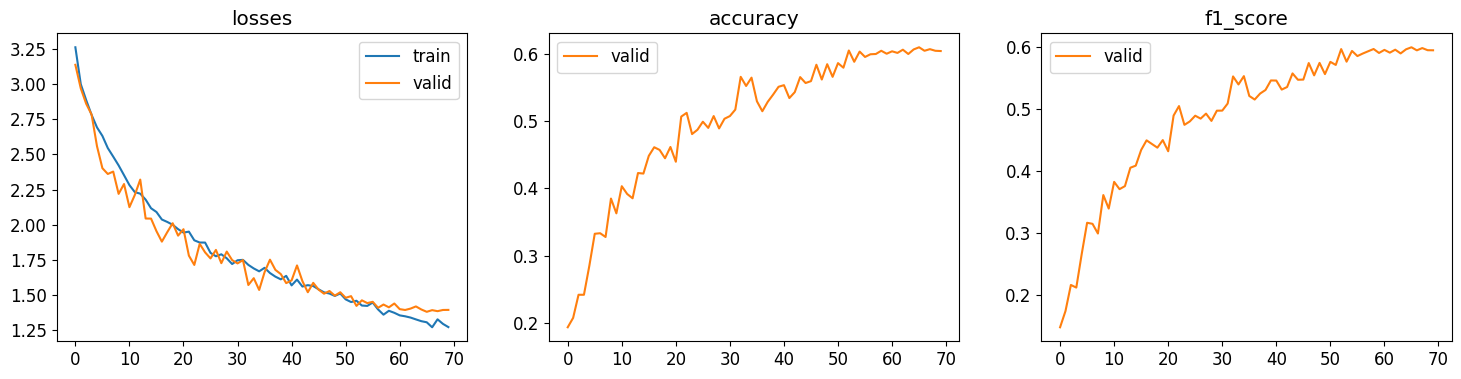

In [ ]:
learn.recorder.plot_metrics()

En este caso, el rendimiento ha aumentado bastante, de una manera mas precisa y constante, por lo que ahora vamos a pasar con un aumento mas en la profundidad del modelo.

Vamos a añadir ahora capas convolucionales con la misma salida de canales que de entrada. Esto lo vamos a hacer porque cada capa convolucional adicional, aunque mantenga la misma dimensionalidad, introduce una transformación no-lineal extra que permite al modelo aprender representaciones más complejas y jerárquicas de los datos.

Además, manteniendo la misma cantidad de canales en una convolución, le estamos permitiendo a la red que refine las características encontradas en la convolución anterior, encontrando combinaciones mas complejas, sin embargo, cuando aumentamos la dimensionalidad directamente, estamos descubriendo nuevas características, perdiendo esta faceta anteriormente mencionada.



In [ ]:
import torch.nn as nn

class BaseNetBatchNorm(nn.Module):
    def __init__(self, dropout_rate=0.5):
        super().__init__()

        self.features = nn.Sequential(
            # Capa 1
            nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3, padding=3),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.Dropout(dropout_rate * 0.1),
            nn.MaxPool2d(kernel_size=2, stride=2),

            nn.Conv2d(in_channels=32, out_channels=32, kernel_size=3, padding=0),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            # Capa 2
            nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, padding=0),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.Dropout(dropout_rate * 0.2),

            nn.Conv2d(in_channels=64, out_channels=64, kernel_size=3, padding=0),
            nn.BatchNorm2d(64),
            nn.ReLU(),

            nn.Conv2d(in_channels=64, out_channels=64, kernel_size=3, padding=0),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.Dropout(dropout_rate * 0.2),

            # Capa 3
            nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, padding=0),
            nn.BatchNorm2d(128),
            nn.ReLU(),
            nn.Dropout(dropout_rate * 0.2),

            nn.Conv2d(in_channels=128, out_channels=128, kernel_size=3, padding=0),
            nn.BatchNorm2d(128),
            nn.ReLU(),

            # Capa 5
            nn.Conv2d(in_channels=128, out_channels=256, kernel_size=3, padding=0),
            nn.BatchNorm2d(256),
            nn.ReLU(),
            nn.Dropout(dropout_rate*0.3),

            nn.Conv2d(in_channels=256, out_channels=256, kernel_size=3, padding=0),
            nn.BatchNorm2d(256),
            nn.ReLU(),
            nn.Dropout(dropout_rate),
        )

        self.pool = nn.AdaptiveAvgPool2d((1, 1))
        self.flatten = nn.Flatten()

        self.classifier = nn.Sequential(
            nn.Dropout(dropout_rate),
            nn.Linear(256, 50)
        )

    def forward(self, x):
        x = self.features(x)
        x = self.pool(x)
        x = self.flatten(x)
        x = self.classifier(x)
        return x

SuggestedLRs(valley=0.004365158267319202)


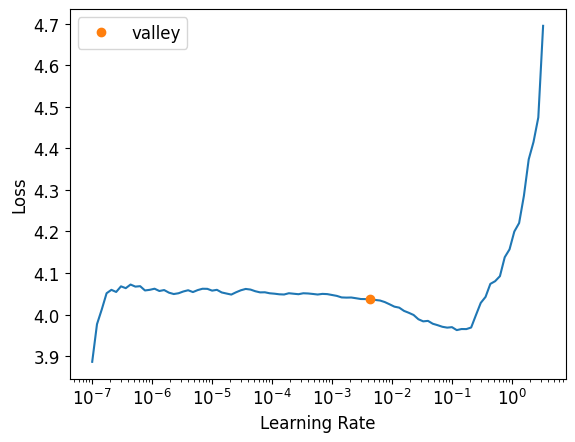

In [ ]:
model = BaseNetBatchNorm(dropout_rate=0.5)

dls = CIFAR_50.dataloaders(path/'train',bs=64)

opt_func = partial(SGD, mom=0.9)
learn = Learner(
    dls,
    model,
    loss_func=nn.CrossEntropyLoss(),
    metrics=[accuracy, F1Score(average='macro')],
    opt_func=opt_func,
    cbs=earlystopping
)
lr_f = learn.lr_find()
print(lr_f)


In [ ]:
learn.fit_one_cycle(90, lr_max=0.04)

No improvement since epoch 76: early stopping


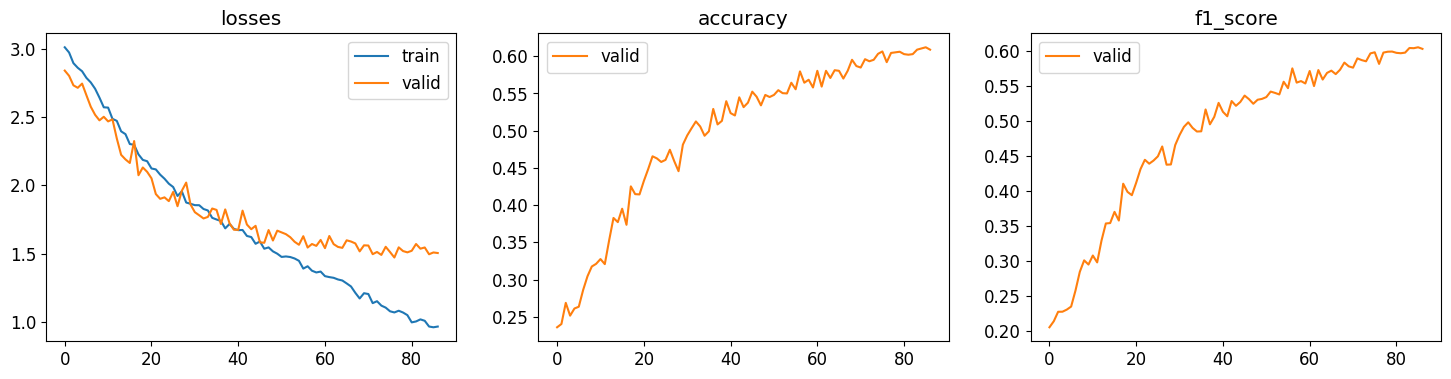

In [ ]:
learn.recorder.plot_metrics()

Vemos como el modelo ha mejorado llegando a un punto de 0.61, pero acaba ocurriendo overfitting. Vamos a seguir con la intención de profundizar en el modelo, añadiendo de nuevo más capas.

Tambien vamos a probar con un batch_size de 32, normalmente el batch size es positivo tener un tamaño alto, pero al reducirlo vamos a conseguir que los pesos se actualicen con mayor frecuencia y por lo tanto se puedan llegar a encontrar mejores soluciones.

In [ ]:
import torch.nn as nn

class BaseNetBatchNorm(nn.Module):
    def __init__(self, dropout_rate=0.5):
        super().__init__()

        self.features = nn.Sequential(
            # Capa 1
            nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3, padding=1),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.Dropout(dropout_rate * 0.1),
            nn.MaxPool2d(kernel_size=2, stride=2),

            nn.Conv2d(in_channels=32, out_channels=32, kernel_size=3, padding=1),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            # Capa 2
            nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.Dropout(dropout_rate * 0.2),

            nn.Conv2d(in_channels=64, out_channels=64, kernel_size=3, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(),

            nn.Conv2d(in_channels=64, out_channels=64, kernel_size=3, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.Dropout(dropout_rate * 0.2),
            nn.MaxPool2d(kernel_size=2, stride=2),

            # Capa 3
            nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU(),
            nn.Dropout(dropout_rate * 0.2),

            nn.Conv2d(in_channels=128, out_channels=128, kernel_size=3, padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU(),

            nn.Conv2d(in_channels=128, out_channels=128, kernel_size=3, padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU(),

            # Capa 5
            nn.Conv2d(in_channels=128, out_channels=256, kernel_size=3, padding=1),
            nn.BatchNorm2d(256),
            nn.ReLU(),
            nn.Dropout(dropout_rate*0.3),

            nn.Conv2d(in_channels=256, out_channels=256, kernel_size=3, padding=1),
            nn.BatchNorm2d(256),
            nn.ReLU(),

            nn.Conv2d(in_channels=256, out_channels=256, kernel_size=3, padding=1),
            nn.BatchNorm2d(256),
            nn.ReLU(),
            nn.Dropout(dropout_rate),
        )

        self.pool = nn.AdaptiveAvgPool2d((1, 1))
        self.flatten = nn.Flatten()

        self.classifier = nn.Sequential(
            nn.Dropout(dropout_rate),
            nn.Linear(256, 50)
        )

    def forward(self, x):
        x = self.features(x)
        x = self.pool(x)
        x = self.flatten(x)
        x = self.classifier(x)
        return x

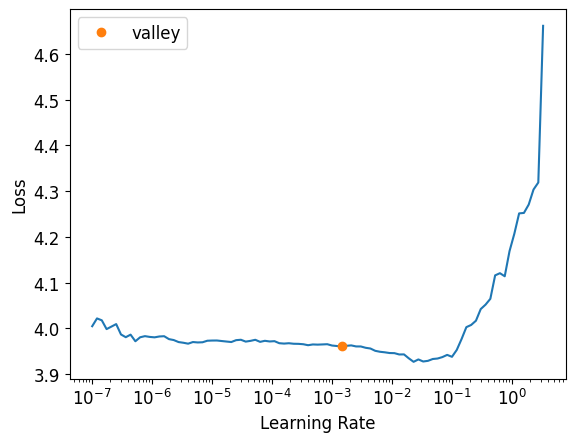

In [ ]:
model = BaseNetBatchNorm(dropout_rate=0.5)

dls = CIFAR_50.dataloaders(path/'train',bs=32)

opt_func = partial(SGD, mom=0.9)
learn = Learner(
    dls,
    model,
    loss_func=nn.CrossEntropyLoss(),
    metrics=[accuracy, F1Score(average='macro')],
    opt_func=opt_func,
    cbs=earlystopping
)
learn.summary()
lr_f = learn.lr_find()


In [ ]:

learn.fit_one_cycle(90, lr_max=0.03)

No improvement since epoch 53: early stopping


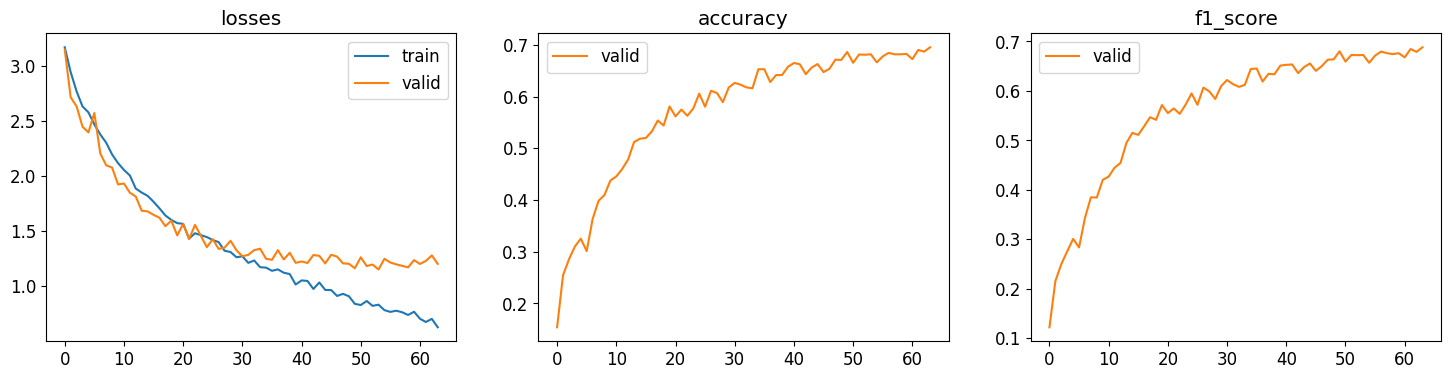

In [ ]:
learn.recorder.plot_metrics()

Aqui vemos como el rendimiento ha sido mucho mejor, lo cual nos dice que la mejora en cuanto a profundidad del modelo ha sido bastante positiva. A lo largo del final de las épocas, acaba ocurriendo overfitting, lo cual es normal para modelos con más cantidad de parámetros.
Aumentar el dropout no es positivo (despues de una prueba rapida) no mejora el modelo, ya que le impide que aprenda, con lo cual lo ideal es buscar un valor promedio como el que tenemos ahora.

Ya hemos superado el obtetivo propuesto del ejercicio, pero vamos a intentar obtener un poco de mejor resultado, además de una mejor optimización mediante la reduccion de los parámetros, por lo tanto vamos a cambiar el modelo adaptando ciertas ideas que nos proporciona un modelo llamado GoogLeNet.

### GoogLeNet

Para llegar al máximo rendimiento, he estado buscando ciertos modelos, y he encontrado uno llamado GoogLeNet (https://arxiv.org/pdf/1409.4842). Este paper trata lo siguiente:

Ataca dos problemas fundamentales. El crecimiento no eficiente de parámetros, el cual consiste en que simplemente aumentar el tamaño y la profundidad de la red lleva a sobreajuste y un uso excesivo de cómputo.

Por otro lado también habla del uso ineficiente de los recursos computacionales, mencionando a las capas densas, capas que según el paper desperdician capacidad cuando la representación óptima sería dispersa.

Para solucionar estos problemas se parte de una idea clave: los modulos inception. Estos modulos consisten en bloques de capas convolucionales, las cuales se calculan de manera paralela, y el resultado de cada una se concatena en una sola salida.

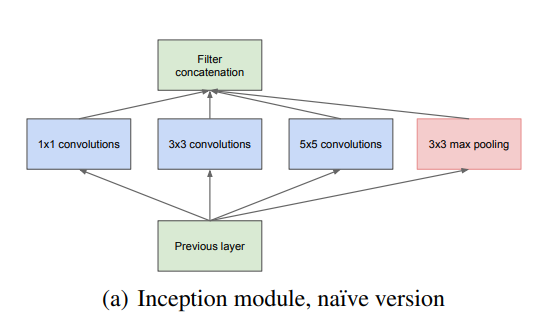

¿Por qué se hace esto?. Pues en el paper se comenta que con estos módulos se trata de conseguir distintos tipos de características, con los distintos tamaños de kernel, para luego concatenar la salida de manera que no perdamos información de ninguna de ellas, para luego posteriormente que la red obtenga lo mas relevante.

Cada rama correspondería con un tipo de característica que se puede extraer, y la cuarta mantiene la información original, ya que unicamente tiene un maxpool, el cual se encarga de conseguir invarianza a traslaciones, pero manteniendo la información cruda.

Por otro lado queda la parte a la que se refiere con el escalado computacional que ocurre, y esto se consigue solucionar con capas convolucionales de reducción de canales.

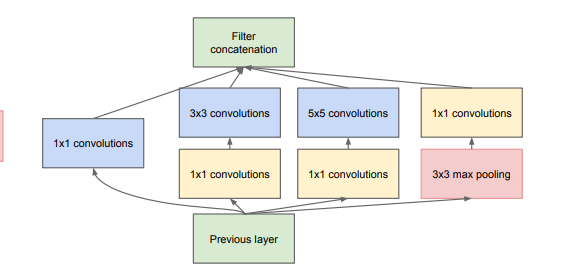

En este caso estariamos aplicando capas convolucionales con kernel 1 las cuales se encargan de reducir la dimensionalidad de la entrada, consiguiendo así más no linealidad por la activación de la capa, y por otra parte tambien seleccionan qué caracterísitcas pasan a las convoluciones grandes, haciendo una especie de criba. Con esto, estamos consiguiendo poder introducir profundidad a la red pero sin que el número de parámetros aumente de manera descontrolada, lo cual es un gran avance.

También se aplica el uso del average pooling, con el cual reemplazan las capas densas tradicionales, dejándolo en una única capa densa final, consiguiendo reducir el numero de parametros de 4 millones a aproximadamente 1 millón, y además obteniendo una mejora en el accuracy de un 0.6%. Aunque este apartado nosotros ya lo hemos implementado.

Cabe destacar, que en el

En nuestro caso, no vamos a copiar el modelo que hay en el paper, pero si vamos a implementar los modulos incepcion con sus tamaños de kernel y sus reducciones, para luego crear un modelo que se componga de varios modulos con parámetros puestos por nosotros, y una capa densa final.

En cuanto a la regularización, vamos a mantener nuestra práctica de introducir numerosas capas de Dropout con una probablidad no muy alta que va creciendo a lo largo del modelo. En caso de que esto sea contraproducente lo cambiaremos en el modelo. Vamos con la implementación del inceptionModule.

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class InceptionModule(nn.Module):
    def __init__(self, in_channels, out_1x1, out_3x3_reduce, out_3x3,
                 out_5x5_reduce, out_5x5, out_pool_proj):
        super().__init__()

        # Rama 1: Solo 1x1 conv
        self.branch1 = nn.Sequential(
            nn.Conv2d(in_channels, out_1x1, kernel_size=1),
            nn.BatchNorm2d(out_1x1),
            nn.ReLU()
        )

        # Rama 2: 1x1 -> 3x3
        self.branch2 = nn.Sequential(
            nn.Conv2d(in_channels, out_3x3_reduce, kernel_size=1),
            nn.BatchNorm2d(out_3x3_reduce),
            nn.ReLU(),
            nn.Conv2d(out_3x3_reduce, out_3x3, kernel_size=3, padding=1),
            nn.BatchNorm2d(out_3x3),
            nn.ReLU()
        )

        # Rama 3: 1x1 -> 5x5
        self.branch3 = nn.Sequential(
            nn.Conv2d(in_channels, out_5x5_reduce, kernel_size=1),
            nn.BatchNorm2d(out_5x5_reduce),
            nn.ReLU(),
            nn.Conv2d(out_5x5_reduce, out_5x5, kernel_size=5, padding=2),
            nn.BatchNorm2d(out_5x5),
            nn.ReLU()
        )

        # Rama 4: MaxPool -> 1x1
        self.branch4 = nn.Sequential(
            nn.MaxPool2d(kernel_size=3, stride=1, padding=1),
            nn.Conv2d(in_channels, out_pool_proj, kernel_size=1),
            nn.BatchNorm2d(out_pool_proj),
            nn.ReLU()
        )

    def forward(self, x):
        # Procesar las 4 ramas en PARALELO
        branch1_out = self.branch1(x)
        branch2_out = self.branch2(x)
        branch3_out = self.branch3(x)
        branch4_out = self.branch4(x)

        # CONCATENAR en la dimensión de canales
        outputs = [branch1_out, branch2_out, branch3_out, branch4_out]
        return torch.cat(outputs, dim=1)

Aquí, seguimos la ruta que hace el paper, creando 4 ramas paralelas de capas convolucionales. Siendo la primera rama una convolución de kernel 1 que se encarga de encontrar las características más locales. La segunda es la del kernel 3, que tiene implementada la reducción de al dimensionalidad de los canales con la primera convolución, y luego la segunda que es la que extrae las características. Hacemos lo mismo con la tercera rama pero con kernel 5, y por último la rama de la información cruda, la cual tambien tiene reduccion de dimensionalidad y su correspondiente maxpool.

En el forward vemos como aplicamos las cuatro ramas de manera paralela, sin que ninguna afecte a otra, para luego concatenarlo todo en una única salida.

En cuanto a los parámetros de entrada, tenemos los distintos números de canales que queremos que hayan en cada rama, out_1x1 (rama1), out_3x3_reduce(reduccion de rama 2), out_3x3(rama 2), out_5x5_reduce (reduccion rama 3), out_5x5 (rama 3), y out_pool_proj (rama 4). Vamos con el modelo, el cual va a ser llamado MiniGoogLeNet.

#### MiniGoogLeNet

In [ ]:
class MiniGoogLeNet(nn.Module):
    def __init__(self, num_classes=50, dropout_rate=0.5):
        super().__init__()

        self.conv1 = nn.Sequential(
            nn.Conv2d(3, 32, kernel_size=3, padding=1),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.MaxPool2d(2, 2)
        )


        self.inception3a = InceptionModule(
            in_channels=32,
            out_1x1=16,
            out_3x3_reduce=16,
            out_3x3=32,
            out_5x5_reduce=8,
            out_5x5=16,
            out_pool_proj=16
        )
        # Salida: 16 + 32 + 16 + 16 = 80 canales

        self.maxpool1 = nn.MaxPool2d(2, 2)

        self.inception4a = InceptionModule(
            in_channels=80,
            out_1x1=32,
            out_3x3_reduce=32,
            out_3x3=64,
            out_5x5_reduce=16,
            out_5x5=32,
            out_pool_proj=32
        )
        # Salida: 32 + 64 + 32 + 32 = 160 canales

        self.avgpool = nn.AdaptiveAvgPool2d((1, 1))

        self.dropout = nn.Dropout(dropout_rate)

        # Capa lineal final
        self.fc = nn.Linear(160, num_classes)


    def forward(self, x):
        # --- Fase 1: Capas iniciales ---
        x = self.conv1(x)

        # --- Fase 2: Primer Inception ---
        x = self.inception3a(x)

        # --- Fase 3: Pooling ---
        x = self.maxpool1(x)

        # --- Fase 4: Segundo Inception ---
        x = self.inception4a(x)

        # --- Fase 5: Pooling global y clasificación ---
        x = self.avgpool(x)
        x = torch.flatten(x, 1)
        x = self.dropout(x)

        main_output = self.fc(x)

        return main_output

SuggestedLRs(valley=0.013182567432522774)


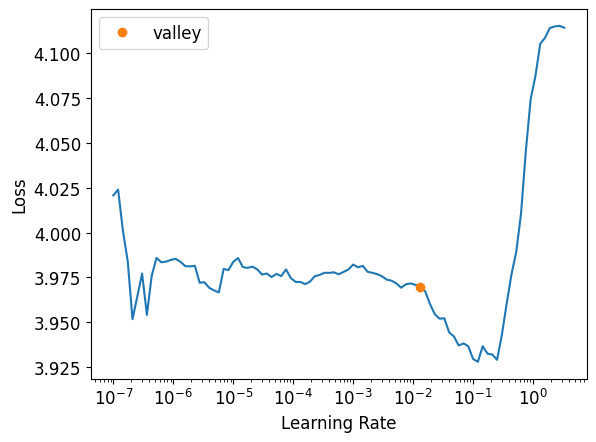

In [ ]:
model = MiniGoogLeNet(dropout_rate=0.5)

dls = CIFAR_50.dataloaders(path/'train',bs=32)

opt_func = partial(SGD, mom=0.9)
learn = Learner(
    dls,
    model,
    loss_func=nn.CrossEntropyLoss(),
    metrics=[accuracy, F1Score(average='macro')],
    opt_func=opt_func,
    cbs=earlystopping
)
lr_f = learn.lr_find()
print(lr_f)

No improvement since epoch 78: early stopping


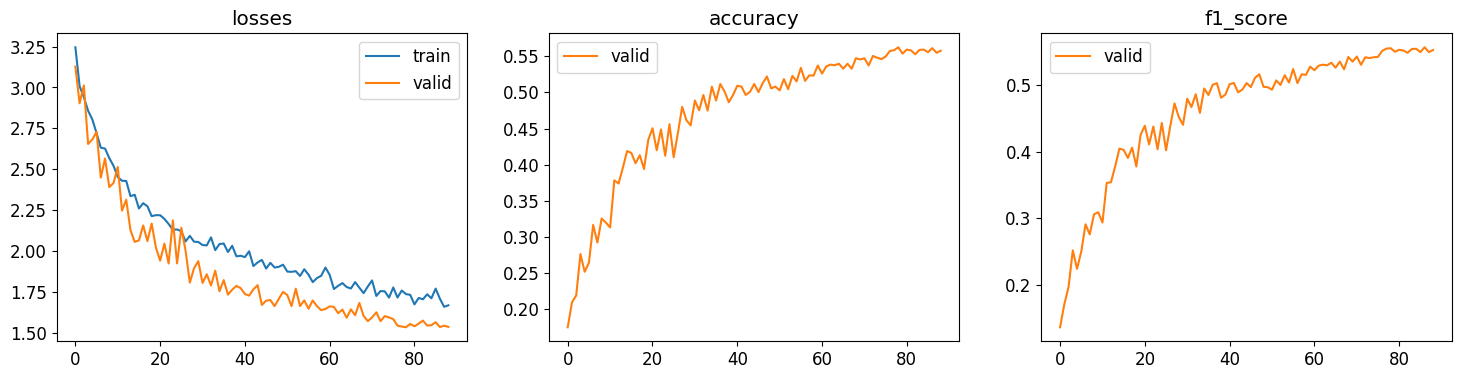

In [ ]:
learn.fit_one_cycle(90, lr_max=0.04)
learn.recorder.plot_metrics()

(Por algun motivo aparece la barra del porcentaje sin completar, pero el entrenamiento ha sido completado) Como vemos, observamos dos cosas, por un lado hay bastante underfitting, quiza por la única capa de dropout que es de 0.5, el cual es bastante agresivo. Y por otro lado observamos un rendimiento notablemente peor, con un pico de 0.55, pero esto esta bastante bien, ya que el número de parámetros es extremadamente menor.

Vamos a comprobar con la comparacion del numero de parámetros con nuestro modelo anterior.

In [ ]:
learn.summary()

MiniGoogLeNet (Input shape: 32 x 3 x 32 x 32)
Layer (type)         Output Shape         Param #    Trainable 
                     32 x 32 x 32 x 32   
Conv2d                                    896        True      
BatchNorm2d                               64         True      
ReLU                                                           
____________________________________________________________________________
                     32 x 32 x 16 x 16   
MaxPool2d                                                      
____________________________________________________________________________
                     32 x 16 x 16 x 16   
Conv2d                                    528        True      
BatchNorm2d                               32         True      
ReLU                                                           
Conv2d                                    528        True      
BatchNorm2d                               32         True      
ReLU                              

In [ ]:
model = BaseNetBatchNorm(dropout_rate=0.5)

dls = CIFAR_50.dataloaders(path/'train',bs=32)

opt_func = partial(SGD, mom=0.9)
learn = Learner(
    dls,
    model,
    loss_func=nn.CrossEntropyLoss(),
    metrics=[accuracy, F1Score(average='macro')],
    opt_func=opt_func,
    cbs=earlystopping
)
learn.summary()


BaseNetBatchNorm (Input shape: 32 x 3 x 32 x 32)
Layer (type)         Output Shape         Param #    Trainable 
                     32 x 32 x 32 x 32   
Conv2d                                    896        True      
BatchNorm2d                               64         True      
ReLU                                                           
Dropout                                                        
____________________________________________________________________________
                     32 x 32 x 16 x 16   
MaxPool2d                                                      
Conv2d                                    9248       True      
BatchNorm2d                               64         True      
ReLU                                                           
____________________________________________________________________________
                     32 x 64 x 16 x 16   
Conv2d                                    18496      True      
BatchNorm2d                    

Como vemos, nuestro modelo nuevo tiene aproximadamente 60k parametros, mientras que el anterior tiene 1.9 millones. La diferencia es masiva, lo cual hace evidente que el nuevo modelo MiniGoogLeNet sea notoriamente peor, pero para la poca cantidad de parametros que tiene podríamos decir que su rendimiento es bastante bueno.

Por lo tanto, lo que vamos a hacer ahora es crear un modelo con mayor cantidad de parámetros pero siguiendo la metodología del googlenet. También vamos a incluir capas dropout como hacíamos anteriormente, con un ratio que vaya incrementando a lo largo de la red.

####MiniGoogLeNet2


In [ ]:
class MiniGoogLeNet2(nn.Module):
    def __init__(self, num_classes=50, dropout_rate=0.5):
        super().__init__()

        self.conv1 = nn.Sequential(
            nn.Conv2d(3, 64, kernel_size=3, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.MaxPool2d(2, 2)
        )

        self.dropout_input = nn.Dropout2d(dropout_rate/5)

        self.inception1 = InceptionModule(
            in_channels=64,
            out_1x1=32,
            out_3x3_reduce=24,
            out_3x3=48,
            out_5x5_reduce=16,
            out_5x5=32,
            out_pool_proj=16
        )  # Salida: 32+48+32+16 = 128 canales

        self.dropout1 = nn.Dropout2d(dropout_rate/2)

        self.inception2 = InceptionModule(
            in_channels=128,
            out_1x1=64,
            out_3x3_reduce=48,
            out_3x3=96,
            out_5x5_reduce=32,
            out_5x5=64,
            out_pool_proj=32
        )  # Salida: 64+96+64+32 = 256 canales

        self.dropout2 = nn.Dropout2d(dropout_rate/2)

        self.inception3 = InceptionModule(
            in_channels=256,
            out_1x1=128,
            out_3x3_reduce=96,
            out_3x3=192,
            out_5x5_reduce=32,
            out_5x5=128,
            out_pool_proj=64
        )  # Salida: 128+192+128+64 = 512 canales

        self.dropout3 = nn.Dropout2d(dropout_rate/2)

        self.inception4 = InceptionModule(
            in_channels=512,
            out_1x1=256,
            out_3x3_reduce=192,
            out_3x3=256,
            out_5x5_reduce=32,
            out_5x5=128,
            out_pool_proj=64
        )  # Salida: 256+256+128+64 = 704 canales
        self.maxpool1 = nn.MaxPool2d(2, 2)  # 16×16 → 8×8
        self.dropout4 = nn.Dropout2d(dropout_rate/2)

        # Pooling global
        self.avgpool = nn.AdaptiveAvgPool2d((1, 1))

        self.classifier = nn.Sequential(
            nn.Linear(704, num_classes)
        )


    def forward(self, x):
        # --- Fase inicial ---
        x = self.conv1(x)
        x = self.dropout_input(x)

        # --- Fase 1 ---
        x = self.inception1(x)
        x = self.dropout1(x)

        # --- Fase 2 ---
        x = self.inception2(x)
        x = self.dropout2(x)
        x = self.maxpool1(x)

        # --- Fase 3 ---
        x = self.inception3(x)
        x = self.dropout3(x)

        # --- Fase 4 ---
        x = self.inception4(x)
        x = self.dropout4(x)

        # --- Pooling global ---
        x = self.avgpool(x)
        x = torch.flatten(x, 1)

        # --- Clasificación ---
        x = self.classifier(x)

        return x

In [ ]:
model = MiniGoogLeNet2(dropout_rate=0.5)

dls = CIFAR_50.dataloaders(path/'train',bs=32)

opt_func = partial(SGD, mom=0.9)
learn = Learner(
    dls,
    model,
    loss_func=nn.CrossEntropyLoss(),
    metrics=[accuracy, F1Score(average='macro')],
    opt_func=opt_func,
    cbs=earlystopping
)
learn.summary()


MiniGoogLeNet2 (Input shape: 32 x 3 x 32 x 32)
Layer (type)         Output Shape         Param #    Trainable 
                     32 x 64 x 32 x 32   
Conv2d                                    1792       True      
BatchNorm2d                               128        True      
ReLU                                                           
____________________________________________________________________________
                     32 x 64 x 16 x 16   
MaxPool2d                                                      
Dropout2d                                                      
____________________________________________________________________________
                     32 x 32 x 16 x 16   
Conv2d                                    2080       True      
BatchNorm2d                               64         True      
ReLU                                                           
____________________________________________________________________________
                    

SuggestedLRs(valley=0.007585775572806597)


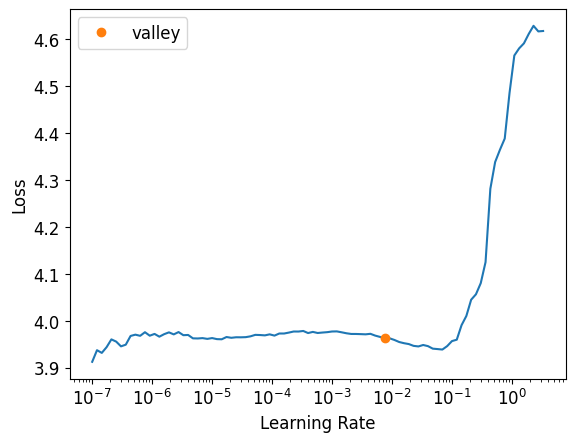

In [ ]:
lr_f = learn.lr_find()
print(lr_f)

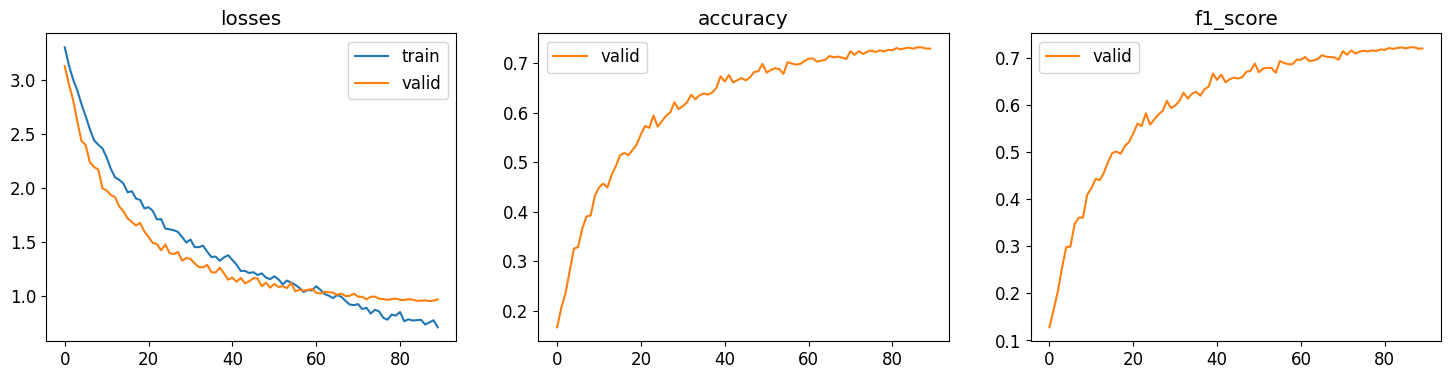

In [ ]:
learn.fit_one_cycle(90, lr_max=0.04)
learn.recorder.plot_metrics()

(Debido a un inesperado corte de la conexion parece que el entrenamiento no ha sido terminado pero realmente si se han cumplido todas las epocas) Vemos como ahora el rendimiento ha sido increiblemente bueno, con un pico de 0.73 de accuracy, teniendo en cuenta que la cantidad de parámetros sigue siendo menor que nuestro modelo previo, este es un resultado excepcional. En las primeras épocas ocurre un ligero underfitting, y en las últimas overfitting.


Considero que modificar el valor del dropout no tendrá sentido, ya que reducirlo quiza nos salva del underfitting inicial, pero inevitablemente acabará ocurriendo el overfitting final. Tampoco merece la pena aumentar el dropout ya que este valor ya es bastante alto y aumentarlo solo nos encontraría problemas para aprender.

Para introducir un poco más de regularización, vamos a añadir el weight decay. Esto consiste en penalizar los valores excesivamente grandes de los parámetros del modelo (los pesos) durante el entrenamiento. En lugar de solo minimizar la pérdida en los datos de entrenamiento, el weight decay añade un término extra a la función de pérdida que es proporcional a la suma de los cuadrados de los pesos. Lo que hace este término es "tirar" suavemente de todos los pesos hacia cero en cada paso de optimización.

El efecto es que previene que los pesos crezcan demasiado, lo que a su vez ayuda a combatir el sobreajuste (overfitting), haciendo que el modelo generalice mejor a datos nuevos. Es como imponerle al modelo una preferencia por soluciones más simples y menos extremas.
Matemáticamente:

$$
L_{total} = L_{original} + λ ⋅ ∑(w_i^2)
$$

Donde $L_{original}$ es la pérdida original, $λ$ es el coeficiente weight decay, y $∑(w_i^2)$ es la suma de los cuadrados de todos los parámetros.

Vamos a empezar con un valor de 1e-4, que suele ser un valor común para este tipo de parámetro.

Por otra parte, siendo un poco ambicioso, voy a intentar conseguir un poco mas de accuracy, creando un modelo aun mas robusto que el anterior, el cual será el definitivo. Vamos a optar por añadir otro bloque final de inception, el cual va a generar salida de 1024, las cuales nos permitirán llegar un poco más lejos en cuanto a la precisión de nuestro modelo.

#### MiniGoogLeNet3

In [ ]:
class MiniGoogLeNet3(nn.Module):
    def __init__(self, num_classes=50, dropout_rate=0.5):
        super().__init__()
        self.conv1 = nn.Sequential(
            nn.Conv2d(3, 64, kernel_size=3, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.MaxPool2d(2, 2)
        )
        self.dropout_input = nn.Dropout2d(dropout_rate/5)

        # --- BLOQUE 1 ---
        self.inception1 = InceptionModule(
            in_channels=64,
            out_1x1=32,
            out_3x3_reduce=24,
            out_3x3=48,
            out_5x5_reduce=16,
            out_5x5=32,
            out_pool_proj=16
        )  # Salida: 32+48+32+16 = 128 canales

        self.dropout1 = nn.Dropout2d(dropout_rate/2)

        # --- BLOQUE 2 ---
        self.inception2 = InceptionModule(
            in_channels=128,
            out_1x1=64,
            out_3x3_reduce=48,
            out_3x3=96,
            out_5x5_reduce=32,
            out_5x5=64,
            out_pool_proj=32
        )  # Salida: 64+96+64+32 = 256 canales

        self.dropout2 = nn.Dropout2d(dropout_rate/2)

        # --- BLOQUE 3 ---
        self.inception3 = InceptionModule(
            in_channels=256,
            out_1x1=128,
            out_3x3_reduce=96,
            out_3x3=192,
            out_5x5_reduce=32,
            out_5x5=128,
            out_pool_proj=64
        )  # Salida: 128+192+128+64 = 512 canales

        self.dropout3 = nn.Dropout2d(dropout_rate/2)

        # --- BLOQUE 4 ---
        self.inception4 = InceptionModule(
            in_channels=512,
            out_1x1=256,
            out_3x3_reduce=192,
            out_3x3=256,
            out_5x5_reduce=32,
            out_5x5=128,
            out_pool_proj=64
        )  # Salida: 256+256+128+64 = 704 canales
        self.maxpool1 = nn.MaxPool2d(2, 2)  # 16×16 → 8×8
        self.dropout4 = nn.Dropout2d(dropout_rate/2)

        # --- BLOQUE 5 ---
        self.inception5 = InceptionModule(
            in_channels=704,
            out_1x1=384,
            out_3x3_reduce=192,
            out_3x3=384,
            out_5x5_reduce=48,
            out_5x5=128,
            out_pool_proj=128
        )
        # Pooling global
        self.avgpool = nn.AdaptiveAvgPool2d((1, 1))
        self.dropout5 = nn.Dropout2d(dropout_rate/1.5)

        self.classifier = nn.Sequential(
            nn.Linear(1024, num_classes)
        )


    def forward(self, x):
        # --- Fase inicial ---
        x = self.conv1(x)
        x = self.dropout_input(x)

        # --- Fase 1 ---
        x = self.inception1(x)
        x = self.dropout1(x)

        # --- Fase 2 ---
        x = self.inception2(x)
        x = self.dropout2(x)
        x = self.maxpool1(x)

        # --- Fase 3 ---
        x = self.inception3(x)
        x = self.dropout3(x)

        # --- Fase 4 ---
        x = self.inception4(x)
        x = self.dropout4(x)

        # --- Fase 5 ---
        x = self.inception5(x)
        x = self.dropout5(x)

        # --- Pooling global ---
        x = self.avgpool(x)
        x = torch.flatten(x, 1)

        # --- Clasificación ---
        x = self.classifier(x)

        return x

Debido a que este modelo va a ser el definitivo, vamos tambien a hacer el summary() y a hacer el cálculo de parámetros. También vamos a hacer la comparación con nuestro nuevo callback y sin el para ver cual es el que dé mejores resultados

SuggestedLRs(valley=0.005248074419796467)


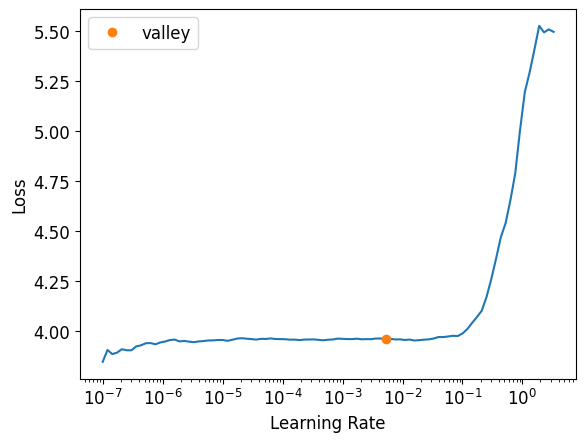

In [ ]:
model = MiniGoogLeNet3(num_classes=50, dropout_rate=0.5)
loss_func = nn.CrossEntropyLoss()
dls = CIFAR_50.dataloaders(path/'train',bs=32, shuffle = True)

learn = Learner(
    dls,
    model,
    loss_func=loss_func,
    metrics=[accuracy, F1Score(average='macro')],
    opt_func=partial(SGD, mom=0.9, wd=1e-4),
    cbs=[EarlyStoppingCallback(monitor='valid_loss', patience=10)
    ]
)

lrf = learn.lr_find()
print(lrf)

In [ ]:
learn.fit_one_cycle(90, lr_max=0.04)

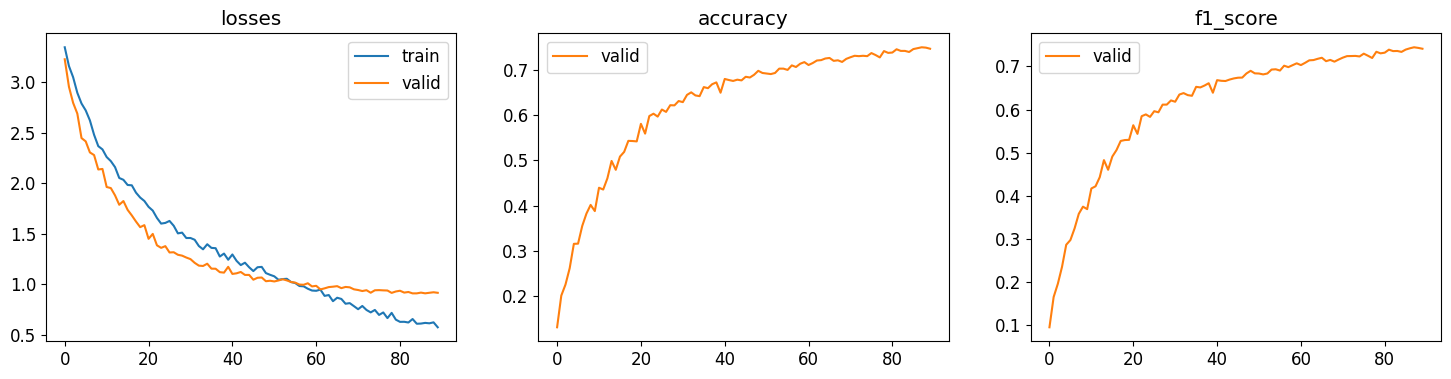

In [ ]:
learn.recorder.plot_metrics()

Como era de esperar, nuestro nuevo modelo ha acabado obteniendo un rendimiento mayor. La mejora no es demasiado considerable, ya que hemos pasado de un 0.73 a un 0.75 de pico, pero es positiva, y además, cuanto más nos acercamos a accuracys altos, más complicado se vuelve conseguir un modelo mejor.

Aun así, vamos ha intentar tratar de mitigar el ligero overfitting que ocurre, y lo vamos a hacer de la siguiente manera.

Voy a crear un callback, el cual va a cambiar el dropout de las capas del modelo, aumentandolo ligeramente, en nuestro caso, va a ser a partir de la época 50. No tengo garantía de que esto vaya a presentar un resultado mejor, pero es algo que se me ha ocurrido para combatir este overfitting y veo bien en probarlo.

Por otro lado, también voy a aumentar el learning rate del fit_one_cycle(), por un lado para contrarestar la subida de dropout, y también para hacer que el aprendizaje del modelo converga en menos épocas.

In [ ]:
class SimpleLateDropout2(Callback):

    def __init__(self, late_dropout=0.6, switch_epoch=50):
        super().__init__()
        self.late_dropout = late_dropout
        self.switch_epoch = switch_epoch
    def before_epoch(self):
        epoch = self.epoch

        if epoch >= self.switch_epoch:
            self.model.dropout_input.p = self.late_dropout / 5
            self.model.dropout1.p = self.late_dropout / 2
            self.model.dropout2.p = self.late_dropout / 2
            self.model.dropout3.p = self.late_dropout / 2
            self.model.dropout4.p = self.late_dropout / 2
            self.model.dropout5.p = self.late_dropout / 1.5


In [ ]:
model = MiniGoogLeNet3(num_classes=50, dropout_rate=0.5)
loss_func = nn.CrossEntropyLoss()
dls = CIFAR_50.dataloaders(path/'train',bs=32, shuffle = True)

learn = Learner(
    dls,
    model,
    loss_func=loss_func,
    metrics=[accuracy, F1Score(average='macro')],
    opt_func=partial(SGD, mom=0.98, wd=1e-4),
    cbs=[EarlyStoppingCallback(monitor='valid_loss', patience=10), SimpleLateDropout2()
    ]
)

learn.fit_one_cycle(100,lr_max=0.065)

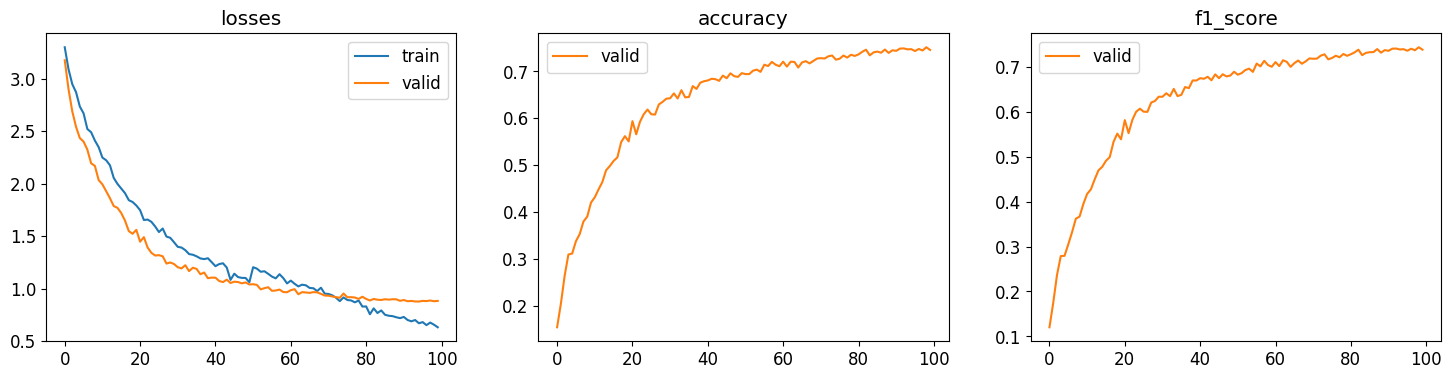

In [ ]:
learn.recorder.plot_metrics()

Como vemos, nuestro intento de suprimir el overfitting no ha servido de mucho, ya que simplemente ha retrasado un poco la convergencia del conjunto valid, y vuelve a estancarse mientras que el modelo sigue aprendiendo en train.

Por lo tanto, vamos a dejar este modelo como el final, con un accuracy de pico de 0.75, y vamos a pasar con el calculo de los parámetros.

##### Parametros


Vamos con el cálculo de los parámetros:

    Conv2d(3, 64, kernel_size=3, padding=1)
    - Fórmula: (canales_entrada × kernel_h × kernel_w + 1) × canales_salida
    - Cálculo: (3 × 3 × 3 + 1) × 64 = (27 + 1) × 64 = 28 × 64 = 1792 parámetros

    BatchNorm2d(64)
    - Fórmula: 2 × canales (gamma + beta por canal)
    - Cálculo: 2 × 64 = 128 parámetros

    Total conv1: 1792 + 128 = 1920 parámetros

- INCEPTION 1:

      Rama 1x1
      Conv2d(64, 32, kernel_size=1)
      - (64 × 1 × 1 + 1) × 32 = (64 + 1) × 32 = 65 × 32 = 2080
      BatchNorm2d(32): 2 × 32 = 64
      Total rama 1x1: 2080 + 64 = 2144


      Rama 3x3
      Conv2d(64, 24, kernel_size=1): (64×1 + 1)×24 = 65×24 = 1560
      BatchNorm: 2×24 = 48
      Conv2d(24, 48, kernel_size=3, padding=1): (24×3×3 + 1)×48 = (216+1)×48 = 217×48 = 10416
      BatchNorm: 2×48 = 96
      Total rama 3x3: 1560+48+10416+96 = 12120

      Rama 5x5

      Conv2d(64, 16, kernel_size=1): (64+1)×16 = 65×16 = 1040
      BatchNorm: 2×16 = 32
      Conv2d(16, 32, kernel_size=5, padding=2): (16×5×5 + 1)×32 = (400+1)×32 = 401×32 = 12832
      BatchNorm: 2×32 = 64
      Total rama 5x5: 1040+32+12832+64 = 13968

      Rama Pooling

      MaxPool2d (sin parámetros)
      Conv2d(64, 16, kernel_size=1): (64+1)×16 = 65×16 = 1040
      BatchNorm: 2×16 = 32
      Total rama pooling: 1040+32 = 1072

      Total inception = 2144 + 12120 + 13968 + 1072 = 29304 parámetros
- INCEPTION 2:

      Rama 1x1

      (128×1 + 1)×64 = 129×64 = 8256
      BatchNorm: 2×64 = 128
      Total: 8384

      Rama 3x3

      Conv1x1: (128+1)×48 = 129×48 = 6192, BatchNorm: 96
      Conv3x3: (48×9 + 1)×96 = 433×96 = 41568, BatchNorm: 192
      Total: 6192+96+41568+192 = 48048

      Rama 5x5

      Conv1x1: (128+1)×32 = 129×32 = 4128, BatchNorm: 64
      Conv5x5: (32×25 + 1)×64 = 801×64 = 51264, BatchNorm: 128
      Total: 4128+64+51264+128 = 55584
            
      Rama Pooling

      (128+1)×32 = 129×32 = 4128, BatchNorm: 64
      Total: 4192

      Total inception = 8384 + 48048 + 55584 + 4192 = 116208 parámetros


- INCEPTION 3:

      Rama 1x1

      (256+1)×128 = 32896, BatchNorm: 256 → 33152

      Rama 3x3

      Conv1x1: (256+1)×96 = 24672, BatchNorm: 192 → 24864
      Conv3x3: (96×9 + 1)×192 = 865×192 = 166080, BatchNorm: 384 → 166464
      Total: 24864+166464 = 191328

      Rama 5x5

      Conv1x1: (256+1)×32 = 8224, BatchNorm: 64 → 8288
      Conv5x5: (32×25 + 1)×128 = 801×128 = 102528, BatchNorm: 256 → 102784
      Total: 8288+102784 = 111072

      Rama Pooling

      (256+1)×64 = 16448, BatchNorm: 128 → 16576

      Total inception = 33152 + 191328 + 111072 + 16576 = 352128 parámetros

- INCEPTION 4:

      Rama 1x1

      (512+1)×256 = 131328, BatchNorm: 512 → 131840

      Rama 3x3

      Conv1x1: (512+1)×192 = 98496, BatchNorm: 384 → 98880
      Conv3x3: (192×9 + 1)×256 = 1729×256 = 442624, BatchNorm: 512 → 443136
      Total: 98880+443136 = 542016

      Rama 5x5

      Conv1x1: (512+1)×32 = 16416, BatchNorm: 64 → 16480
      Conv5x5: (32×25 + 1)×128 = 801×128 = 102528, BatchNorm: 256 → 102784
      Total: 16480+102784 = 119264

      Rama Pooling

      (512+1)×64 = 32832, BatchNorm: 128 → 32960

      Total inception = 131840 + 542016 + 119264 + 32960 = 826080 parámetros

- INCEPTION 5:

      Rama 1x1

      (704+1)×384 = 270720, BatchNorm: 768 → 271488

      Rama 3x3

      Conv1x1: (704+1)×192 = 135360, BatchNorm: 384 → 135744
      Conv3x3: (192×9 + 1)×384 = 1729×384 = 663936, BatchNorm: 768 → 664704
      Total: 135744+664704 = 800448

      Rama 5x5

      Conv1x1: (704+1)×48 = 33840, BatchNorm: 96 → 33936
      Conv5x5: (48×25 + 1)×128 = 1201×128 = 153728, BatchNorm: 256 → 153984
      Total: 33936+153984 = 187920

      Rama Pooling

      (704+1)×128 = 90240, BatchNorm: 256 → 90496

      Total inception = 271488 + 800448 + 187920 + 90496 = 1,350,352 parámetros



Capa final:

      Entrada: 1024 (de Inception5), Salida: 50 clases
      Fórmula: (entrada + 1) × salida
      (1024 + 1) × 50 = 1025 × 50 = 51,250 parámetros

Resumen total:

      1. conv1:                   1,920
      2. Inception1:             29,304
      3. Inception2:            116,208
      4. Inception3:            352,128
      5. Inception4:            826,080
      6. Inception5:          1,350,352
      7. Linear:                51,250
      ─────────────────────────────────
      TOTAL:                 2,727,242 parámetros

Vamos ahora a comprobar que esto es correcto viendo el summary

In [ ]:
learn.summary()

MiniGoogLeNet3 (Input shape: 32 x 3 x 32 x 32)
Layer (type)         Output Shape         Param #    Trainable 
                     32 x 64 x 32 x 32   
Conv2d                                    1792       True      
BatchNorm2d                               128        True      
ReLU                                                           
____________________________________________________________________________
                     32 x 64 x 16 x 16   
MaxPool2d                                                      
Dropout2d                                                      
____________________________________________________________________________
                     32 x 32 x 16 x 16   
Conv2d                                    2080       True      
BatchNorm2d                               64         True      
ReLU                                                           
____________________________________________________________________________
                    

Como vemos, el número de parámetros finales coincide perfectamente, y si vamos capa por capa también veremos que es correcto el cálculo.

Vamos ahora a pasar con las predicciones y resultados en el conjunto de test.

#### Análisis de predicciones

In [ ]:
from sklearn.metrics import accuracy_score, f1_score

def show_metrics(preds, targs, name="", problem_type='regression'):

    preds = preds.cpu()
    targs = targs.cpu()

    if preds.ndim > 1 and preds.shape[1] > 1:
        preds_classes = preds.argmax(dim=1).numpy()
    else:
        preds_classes = preds.squeeze().numpy()

    targs = targs.squeeze().numpy()

    acc = accuracy_score(targs, preds_classes)
    f1  = f1_score(targs, preds_classes, average='macro')

    print(f"{name} (Classification)")
    print(f"  Accuracy: {acc:.4f}")
    print(f"  F1 score : {f1:.4f}")


In [ ]:

# Train
preds_train, targs_train = learn.get_preds(dl=learn.dls.train)
show_metrics(preds_train, targs_train, "Train")

# Validation
preds_val, targs_val = learn.get_preds(dl=learn.dls.valid)
show_metrics(preds_val, targs_val, "Validation")

# Test
test_dl = learn.dls.test_dl(files_test,with_labels=True)
preds_test, targs_test = learn.get_preds(dl=test_dl)
show_metrics(preds_test, targs_test, "Test")

Train (Classification)
  Accuracy: 0.9315
  F1 score : 0.9314


Validation (Classification)
  Accuracy: 0.7460
  F1 score : 0.7378


Test (Classification)
  Accuracy: 0.7306
  F1 score : 0.7281


Vemos que en test finalmente ha salido un 0.73 de accuracy y un 0.728 en F1 score, lo cual es ligeramente peor que en validación, pero un buen resultado.

Vamos a ver la matriz de confusión de los resultados de test. Únicamente del conjunto de test debido a que pienso que es lo que principalmente nos interesa mirar.


--- Evaluando: Test ---
Peores 10 clases (índice y exactitud):
Clase 35: 0.32
Clase 28: 0.42
Clase 23: 0.49
Clase 2: 0.50
Clase 46: 0.55
Clase 32: 0.58
Clase 16: 0.58
Clase 47: 0.59
Clase 36: 0.60
Clase 40: 0.61


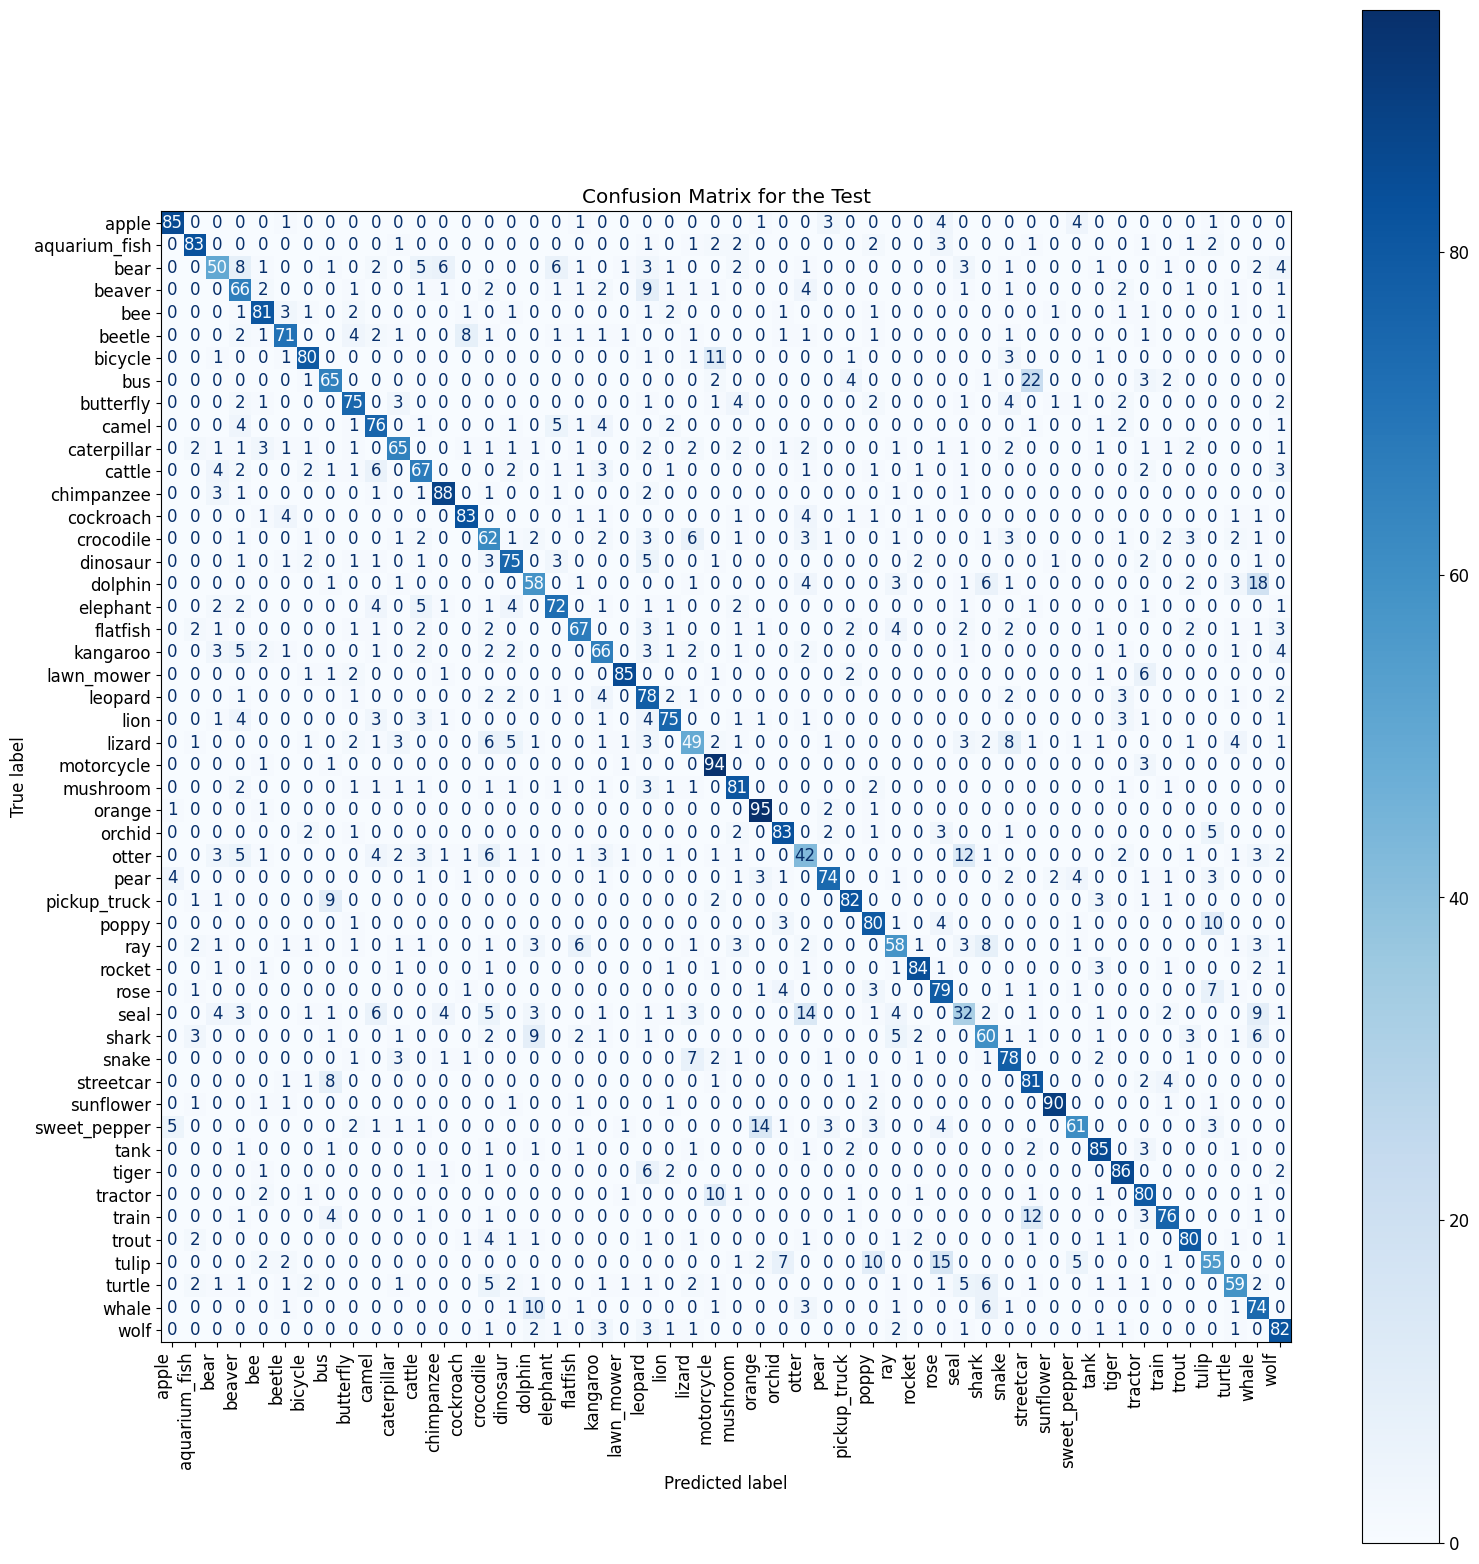

In [ ]:
confusion_matrix_plot(learn, test_dl, "Test")

Vemos que las tres clases con peores resultados son la 35, 28 y 23, las tres con una precisión menor al 0.5, lo cual es notablemente bajo. Vamos a ver algunos ejemplos de estas para poder deducir que es lo que puede que le esté costando al modelo.

Le he pedido a deepseek que me genere un codigo para poder visualizar unos ejemplos de las imagenes de las peores clases, debido a que he estado teniendo problemas para poder hacerlo.


=== Clase 35: seal ===
Encontrados 6 ejemplos


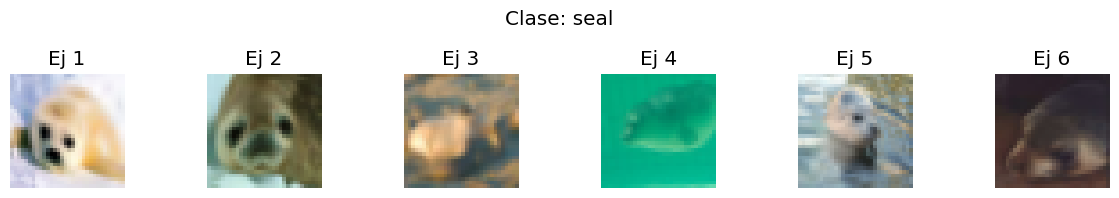


=== Clase 28: otter ===
Encontrados 6 ejemplos


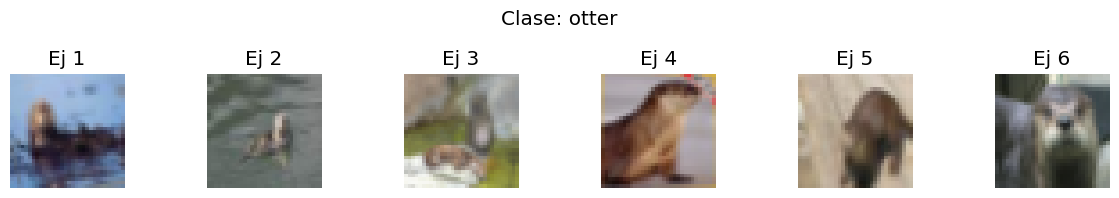


=== Clase 23: lizard ===
Encontrados 6 ejemplos


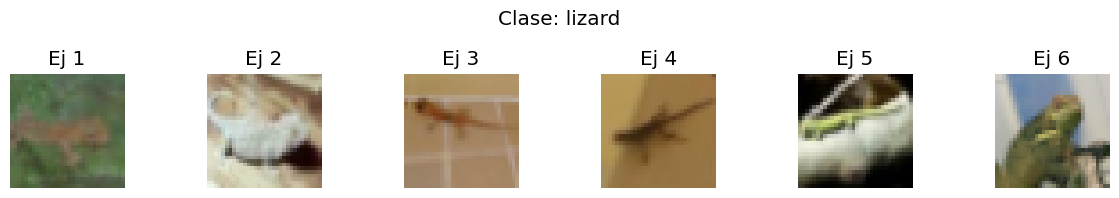

In [ ]:
clases_interes = [35, 28, 23]
nombres_clases = [dls.vocab[idx] for idx in clases_interes]
num_ejemplos_por_clase = 6
mean = torch.tensor([0.485, 0.456, 0.406]).view(3, 1, 1)
std = torch.tensor([0.229, 0.224, 0.225]).view(3, 1, 1)
for idx_clase, nombre_clase in zip(clases_interes, nombres_clases):
    print(f"\n=== Clase {idx_clase}: {nombre_clase} ===")

    ejemplos_encontrados = []
    batch_count = 0
    max_batches = 20

    # Crear un nuevo iterador para cada clase
    train_iter = iter(dls.train)

    while len(ejemplos_encontrados) < num_ejemplos_por_clase and batch_count < max_batches:
        try:
            train_features, train_labels = next(train_iter)
        except StopIteration:
            # Reiniciar el iterador si se acaba
            train_iter = iter(dls.train)
            train_features, train_labels = next(train_iter)

        # Filtrar ejemplos de esta clase
        indices = (train_labels == idx_clase).nonzero(as_tuple=True)[0]

        for idx in indices:
            if len(ejemplos_encontrados) < num_ejemplos_por_clase:
                img = train_features[idx].cpu()
                ejemplos_encontrados.append(img)

        batch_count += 1

    # Mostrar
    if ejemplos_encontrados:
        print(f"Encontrados {len(ejemplos_encontrados)} ejemplos")

        fig, axes = plt.subplots(1, len(ejemplos_encontrados),
                                 figsize=(len(ejemplos_encontrados)*2, 2))
        if len(ejemplos_encontrados) == 1:
            axes = [axes]

        for i, img in enumerate(ejemplos_encontrados):
            # Desnormalizar
            img_denorm = img * std + mean
            img_denorm = torch.clamp(img_denorm, 0, 1)  # Asegurar rango [0,1]

            # Reordenar canales
            img_permuted = img_denorm.permute(1, 2, 0).numpy()

            axes[i].imshow(img_permuted)
            axes[i].axis('off')
            axes[i].set_title(f"Ej {i+1}")

        plt.suptitle(f"Clase: {nombre_clase}")
        plt.tight_layout()
        plt.show()
    else:
        print(f"No encontrados después de {batch_count} batches")

Aqui tenemos unos cuantos ejemplos de imágenes de cada clase, podemos deducir que los dos primeros animales, principalmente las fotos estan tomadas de muchos angulos distintos, con colores y tipos de iluminacion bastante distintas.

Por otro lado, la clase del lagarto es posible que le cueste debido a lo pequeño que es el animal y lo confundible que puede llegar a ser.

De hecho, si volvemos a revisar la matriz de confusion, vemos que gran parte de los errores de la clase seal, han sido por haber predecido otter, esto es logico ya que estos dos animales se parecen bastantes.

Por otro lado, con lizard vemos que han habido bastantes confusiones con la clase snake, lo cual tiene también bastante sentido.